In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 1.	Understand the dataset:

In [2]:
df=pd.read_csv('PEP1.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# a.Identify the shape of the dataset

In [3]:
df.shape

(1460, 81)

# b.Identify variables with null values

In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

# c.Identify variables with unique values

In [5]:
for i in range(81):
    print(df.columns[i],df[df.columns[i]].unique())

Id [   1    2    3 ... 1458 1459 1460]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 

# 2.Generate a separate dataset for numerical and categorical variables

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [7]:
cat_df=df[['Id','MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',
       'HouseStyle','RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functiol','FireplaceQu','GarageType','GarageFinish','GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'SalePrice']]

In [8]:
cat_df.shape

(1460, 45)

In [9]:
num_df=df[['Id', 'MSSubClass', 'LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea','MiscVal',
       'MoSold', 'YrSold','SalePrice']]

In [10]:
num_df.shape

(1460, 38)

# a.Missing value treatment

In [11]:
num_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
num_df['LotFrontage'].mean()

70.04995836802665

In [13]:
num_df['GarageYrBlt'].mean()

1978.5061638868744

In [14]:
num_df['LotFrontage'].fillna(70.04995836802665, inplace=True)

In [15]:
num_df['GarageYrBlt'].fillna(1978, inplace=True)

In [16]:
num_df['MasVnrArea'].fillna(103.68526170798899, inplace=True)

In [17]:
num_df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [18]:
cat_df.isnull().sum()

Id                  0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int

In [19]:
cat_df.drop(['PoolQC','MiscFeature','Fence','Alley'], axis=1, inplace=True)

In [20]:
cat_df.isnull().sum()

Id                 0
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functiol           0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64

In [21]:
cat_df=cat_df.fillna({'GarageQual':'TA','GarageCond':'TA','BsmtQual':'TA','BsmtCond':'TA','BsmtExposure':'No','BsmtFinType1':'Unf','BsmtFinType2':'Unf','Electrical':'SBrkr','FireplaceQu':'Gd','GarageType':'Attchd','GarageFinish':'Unf','MasVnrType':'None'})

In [22]:
cat_df.isnull().sum()

Id               0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [23]:
correlation=num_df.corr()
correlation.sort_values(by='SalePrice',ascending=False)

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
SalePrice     -0.021917   -0.084284     0.334901  0.263843     0.790982   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
GrLivArea      0.008273    0.074853     0.368392  0.263116     0.593007   
GarageCars     0.016570   -0.040110     0.269729  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323663  0.180403     0.562022   
TotalBsmtSF   -0.015415   -0.238518     0.363358  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.414266  0.299475     0.476224   
FullBath       0.005587    0.131608     0.180424  0.126031     0.550600   
TotRmsAbvGrd   0.027239    0.040380     0.320146  0.190015     0.427452   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
GarageYrBlt    0.000136    0.079774     0.064792 -0.024454     0.519278   
Fireplaces    -0.019772   -0.045569     0.235755  0.271364     0.396765   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
WoodDeckSF    -0.029643   -0.012579     0.077106  0.171698     0.238923   
2ndFlrSF       0.005590    0.307886     0.072483  0.050986     0.295493   
OpenPorchSF   -0.000477   -0.006100     0.137454  0.084774     0.308819   
HalfBath       0.006784    0.177354     0.048258  0.014259     0.273458   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
BsmtFullBath   0.002289    0.003491     0.091481  0.158155     0.111098   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
BedroomAbvGr   0.037719   -0.023438     0.237023  0.119690     0.101676   
ScreenPorch    0.001330   -0.026030     0.037684  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180868  0.077672     0.065166   
MoSold         0.021172   -0.013585     0.010158  0.001205     0.070815   
3SsnPorch     -0.046635   -0.043825     0.062335  0.020423     0.030371   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtHalfBath  -0.020155   -0.002333    -0.006419  0.048046    -0.040150   
MiscVal       -0.006242   -0.007683     0.001168  0.038068    -0.031406   
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
LowQualFinSF  -0.044230    0.046474     0.036849  0.004779    -0.030429   
YrSold         0.000712   -0.021407     0.006768 -0.014261    -0.027347   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
EnclosedPorch  0.002889   -0.012037     0.009790 -0.018340    -0.113937   
KitchebvGr     0.002951    0.281721    -0.005805 -0.017784    -0.183882   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
SalePrice        -0.077856   0.522897      0.507101    0.475241    0.386420   
OverallQual      -0.091932   0.572323      0.550684    0.410238    0.239666   
GrLivArea        -0.079686   0.199010      0.287389    0.389893    0.208171   
GarageCars       -0.185758   0.537850      0.420622    0.363778    0.224054   
GarageArea       -0.151521   0.478954      0.371600    0.372567    0.296970   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.362452    0.522396   
1stFlrSF         -0.144203   0.281986      0.240379    0.342160    0.445863   
FullBath         -0.194149   0.468271      0.439046    0.275730    0.058543   
TotRmsAbvGrd     -0.057583   0.095589      0.191740    0.280027    0.044316   
YearBuilt        -0.375983   1.000000      0.592855    0.314745    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179186    0.128451   
MasVnrArea       -0.127788   0.314745      0.179186    1.000000    0.263582   
GarageYrBlt      -0.306118   0.781662      0.618672    0.249947    0

<AxesSubplot:>

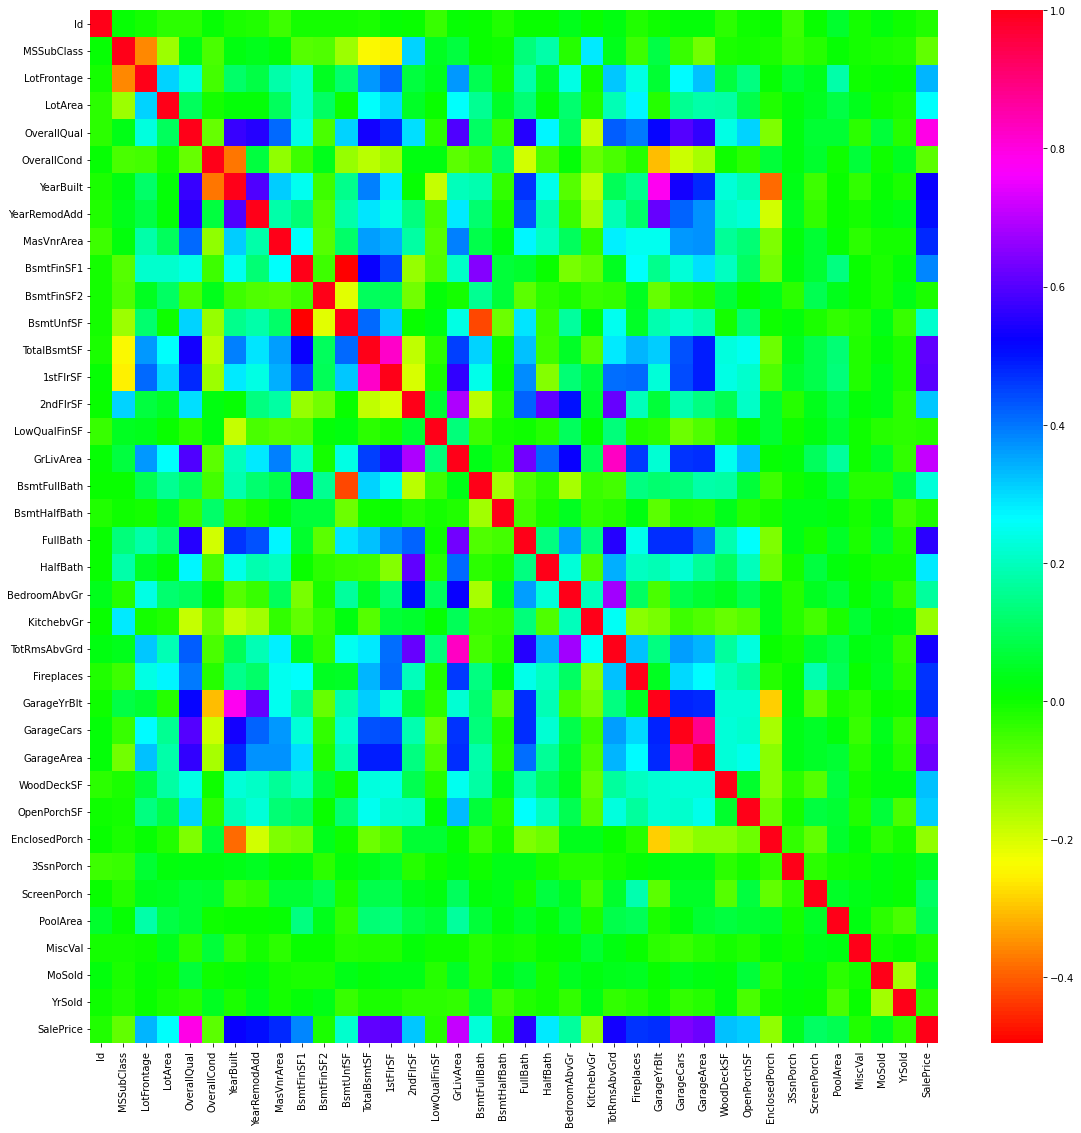

In [24]:
plt.figure(figsize=(19,19))
sns.heatmap(correlation, cmap='hsv')

In [25]:
correlation.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
corr_top=correlation[(correlation['SalePrice']>=0.111447)| (correlation['SalePrice']<=-0.128578)]
corr_top

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
LotFrontage  -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea      -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual  -0.028365    0.032628     0.234196  0.105806     1.000000   
YearBuilt    -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea   -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1   -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtUnfSF    -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF  -0.015415   -0.238518     0.363358  0.260833     0.537808   
1stFlrSF      0.010496   -0.251758     0.414266  0.299475     0.476224   
2ndFlrSF      0.005590    0.307886     0.072483  0.050986     0.295493   
GrLivArea     0.008273    0.074853     0.368392  0.263116     0.593007   
BsmtFullBath  0.002289    0.003491     0.091481  0.158155     0.111098   
FullBath      0.005587    0.131608     0.180424  0.126031     0.550600   
HalfBath      0.006784    0.177354     0.048258  0.014259     0.273458   
BedroomAbvGr  0.037719   -0.023438     0.237023  0.119690     0.101676   
KitchebvGr    0.002951    0.281721    -0.005805 -0.017784    -0.183882   
TotRmsAbvGrd  0.027239    0.040380     0.320146  0.190015     0.427452   
Fireplaces   -0.019772   -0.045569     0.235755  0.271364     0.396765   
GarageYrBlt   0.000136    0.079774     0.064792 -0.024454     0.519278   
GarageCars    0.016570   -0.040110     0.269729  0.154871     0.600671   
GarageArea    0.017634   -0.098672     0.323663  0.180403     0.562022   
WoodDeckSF   -0.029643   -0.012579     0.077106  0.171698     0.238923   
OpenPorchSF  -0.000477   -0.006100     0.137454  0.084774     0.308819   
SalePrice    -0.021917   -0.084284     0.334901  0.263843     0.790982   

              OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
LotFrontage     -0.052820   0.117598      0.082746    0.179283    0.215828   
LotArea         -0.005636   0.014228      0.013788    0.103960    0.214103   
OverallQual     -0.091932   0.572323      0.550684    0.410238    0.239666   
YearBuilt       -0.375983   1.000000      0.592855    0.314745    0.249503   
YearRemodAdd     0.073741   0.592855      1.000000    0.179186    0.128451   
MasVnrArea      -0.127788   0.314745      0.179186    1.000000    0.263582   
BsmtFinSF1      -0.046231   0.249503      0.128451    0.263582    1.000000   
BsmtUnfSF       -0.136841   0.149040      0.181133    0.114184   -0.495251   
TotalBsmtSF     -0.171098   0.391452      0.291066    0.362452    0.522396   
1stFlrSF        -0.144203   0.281986      0.240379    0.342160    0.445863   
2ndFlrSF         0.028942   0.010308      0.140024    0.174019   -0.137079   
GrLivArea       -0.079686   0.199010      0.287389    0.389893    0.208171   
BsmtFullBath    -0.054942   0.187599      0.119470    0.085055    0.649212   
FullBath        -0.194149   0.468271      0.439046    0.275730    0.058543   
HalfBath        -0.060769   0.242656      0.183331    0.200802    0.004262   
BedroomAbvGr     0.012980  -0.070651     -0.040581    0.102417   -0.107355   
KitchebvGr      -0.087001  -0.174800     -0.149598   -0.037364   -0.081007   
TotRmsAbvGrd    -0.057583   0.095589      0.191740    0.280027    0.044316   
Fireplaces      -0.023820   0.147716      0.112581    0.247906    0.260011   
GarageYrBlt     -0.306118   0.781662      0.618672    0.249947    0.150858   
GarageCars      -0.185758   0.537850      0.420622    0.363778    0.224054   
GarageArea      -0.151521   0.478954      0.371600    0.372567    0.296970   
WoodDeckSF      -0.003334   0.224880      0.205726    0.159349    0.204306   
OpenPorchSF     -0.032589   0.188686      0.226298    0.124965    0.111761   
SalePrice       -0.077856   0.522897      0.507101    0.475241    0.386420   

              ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPor

<AxesSubplot:>

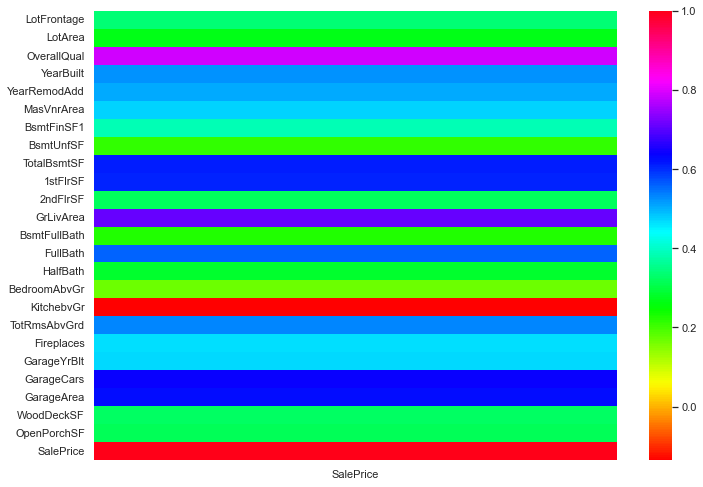

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr_top[['SalePrice']], cmap='hsv')

In [28]:
corr_top.drop(['TotRmsAbvGrd', 'EnclosedPorch','GarageYrBlt','BsmtFullBath', 'BsmtUnfSF', 'MSSubClass', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [29]:
corr_top

Id  LotFrontage   LotArea  OverallQual  OverallCond  \
LotFrontage  -0.009601     1.000000  0.306795     0.234196    -0.052820   
LotArea      -0.033226     0.306795  1.000000     0.105806    -0.005636   
OverallQual  -0.028365     0.234196  0.105806     1.000000    -0.091932   
YearBuilt    -0.012713     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd -0.021998     0.082746  0.013788     0.550684     0.073741   
MasVnrArea   -0.050199     0.179283  0.103960     0.410238    -0.127788   
BsmtFinSF1   -0.005024     0.215828  0.214103     0.239666    -0.046231   
BsmtUnfSF    -0.007940     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF  -0.015415     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF      0.010496     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF      0.005590     0.072483  0.050986     0.295493     0.028942   
GrLivArea     0.008273     0.368392  0.263116     0.593007    -0.079686   
BsmtFullBath  0.002289     0.091481  0.158155     0.111098    -0.054942   
FullBath      0.005587     0.180424  0.126031     0.550600    -0.194149   
HalfBath      0.006784     0.048258  0.014259     0.273458    -0.060769   
BedroomAbvGr  0.037719     0.237023  0.119690     0.101676     0.012980   
KitchebvGr    0.002951    -0.005805 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd  0.027239     0.320146  0.190015     0.427452    -0.057583   
Fireplaces   -0.019772     0.235755  0.271364     0.396765    -0.023820   
GarageYrBlt   0.000136     0.064792 -0.024454     0.519278    -0.306118   
GarageCars    0.016570     0.269729  0.154871     0.600671    -0.185758   
GarageArea    0.017634     0.323663  0.180403     0.562022    -0.151521   
WoodDeckSF   -0.029643     0.077106  0.171698     0.238923    -0.003334   
OpenPorchSF  -0.000477     0.137454  0.084774     0.308819    -0.032589   
SalePrice    -0.021917     0.334901  0.263843     0.790982    -0.077856   

              YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage    0.117598      0.082746    0.179283    0.215828    0.043340   
LotArea        0.014228      0.013788    0.103960    0.214103    0.111170   
OverallQual    0.572323      0.550684    0.410238    0.239666   -0.059119   
YearBuilt      1.000000      0.592855    0.314745    0.249503   -0.049107   
YearRemodAdd   0.592855      1.000000    0.179186    0.128451   -0.067759   
MasVnrArea     0.314745      0.179186    1.000000    0.263582   -0.072302   
BsmtFinSF1     0.249503      0.128451    0.263582    1.000000   -0.050117   
BsmtUnfSF      0.149040      0.181133    0.114184   -0.495251   -0.209294   
TotalBsmtSF    0.391452      0.291066    0.362452    0.522396    0.104810   
1stFlrSF       0.281986      0.240379    0.342160    0.445863    0.097117   
2ndFlrSF       0.010308      0.140024    0.174019   -0.137079   -0.099260   
GrLivArea      0.199010      0.287389    0.389893    0.208171   -0.009640   
BsmtFullBath   0.187599      0.119470    0.085055    0.649212    0.158678   
FullBath       0.468271      0.439046    0.275730    0.058543   -0.076444   
HalfBath       0.242656      0.183331    0.200802    0.004262   -0.032148   
BedroomAbvGr  -0.070651     -0.040581    0.102417   -0.107355   -0.015728   
KitchebvGr    -0.174800     -0.149598   -0.037364   -0.081007   -0.040751   
TotRmsAbvGrd   0.095589      0.191740    0.280027    0.044316   -0.035227   
Fireplaces     0.147716      0.112581    0.247906    0.260011    0.046921   
GarageYrBlt    0.781662      0.618672    0.249947    0.150858   -0.086933   
GarageCars     0.537850      0.420622    0.363778    0.224054   -0.038264   
GarageArea     0.478954      0.371600    0.372567    0.296970   -0.018227   
WoodDeckSF     0.224880      0.205726    0.159349    0.204306    0.067898   
OpenPorchSF    0.188686      0.226298    0.124965    0.111761    0.003093   
SalePrice      0.522897      0.507101    0.475241    0.386420   -0.011378   

              ...  GarageArea  WoodDeckSF  OpenPorchSF  3SsnPorch 

<AxesSubplot:>

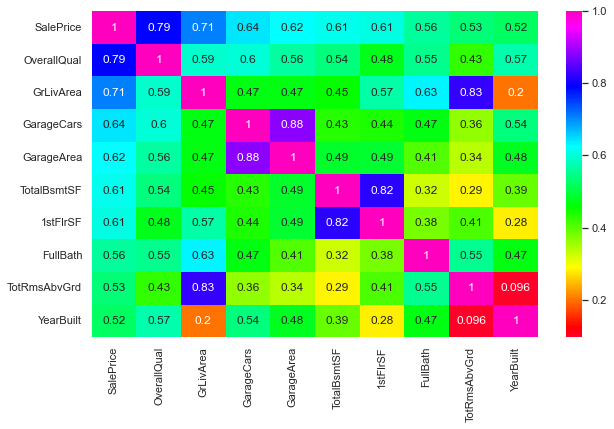

In [30]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'gist_rainbow')

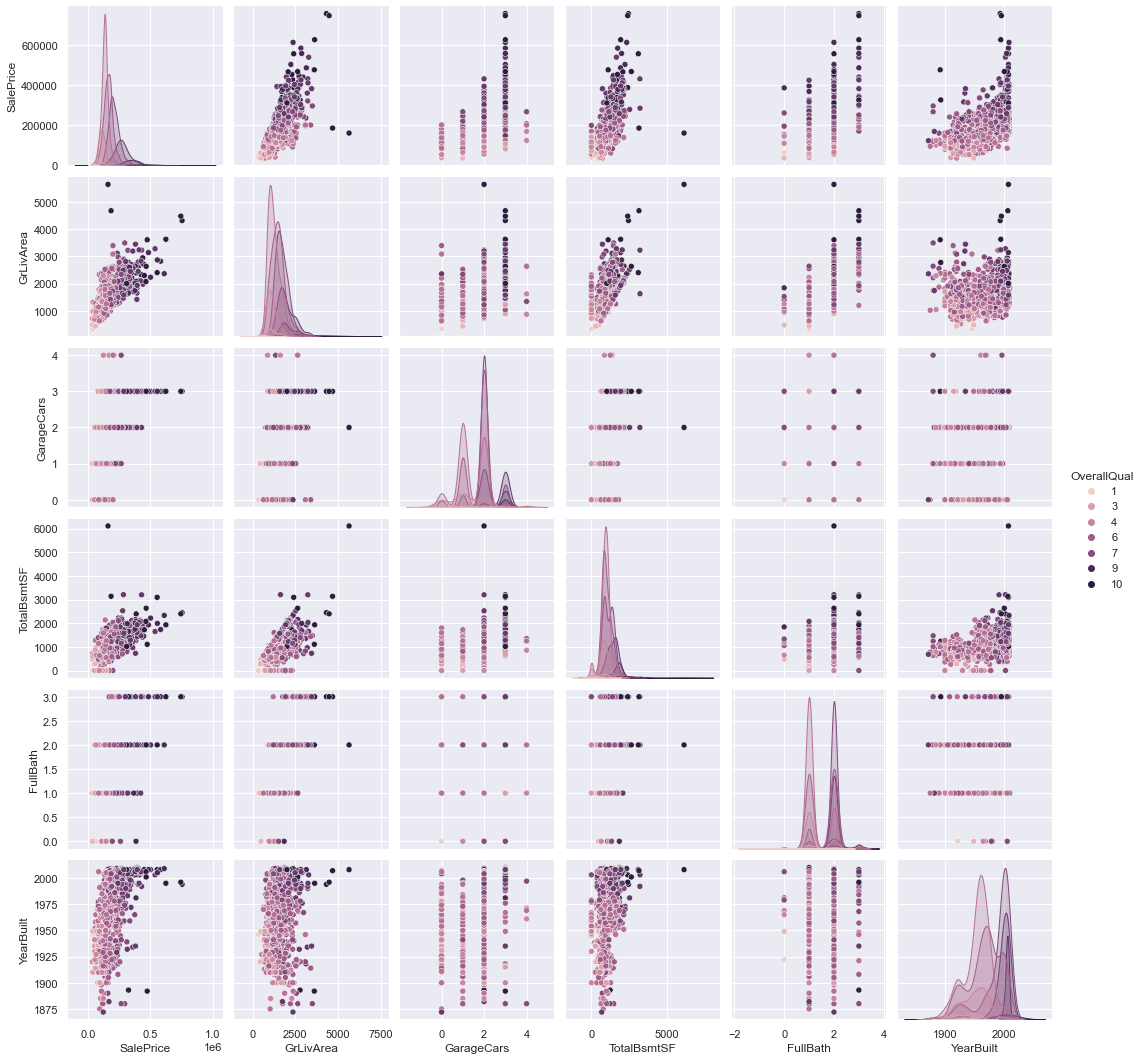

In [31]:
# Visualizing relations between all major variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols],hue='OverallQual')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

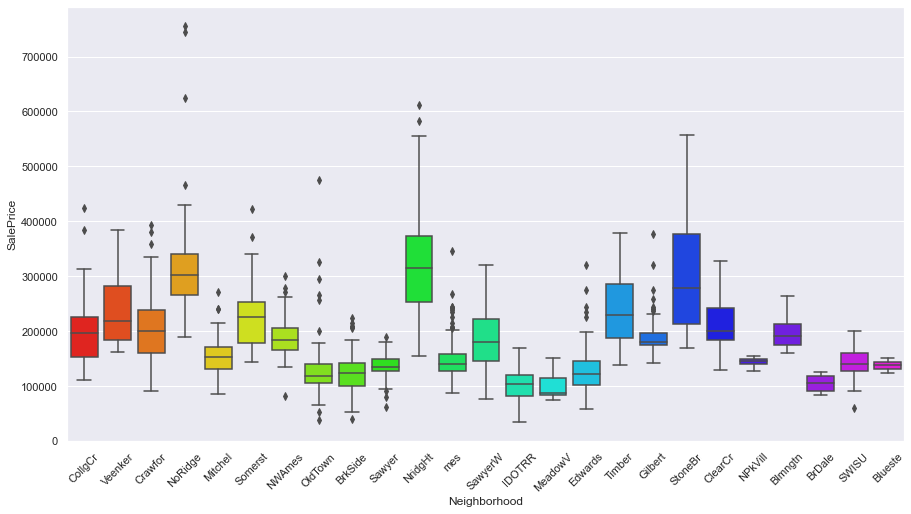

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=df,palette='gist_rainbow')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

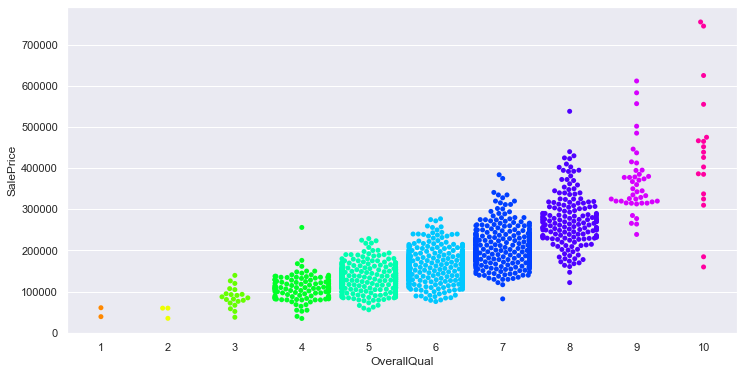

In [33]:
plt.figure(figsize=(12,6))
sns.swarmplot('OverallQual', 'SalePrice', data=df,palette='hsv')

In [34]:
crosstab = pd.crosstab(index=df["Neighborhood"], columns=df["OverallQual"])
crosstab

OverallQual   1   2   3   4    5   6   7   8   9   10
Neighborhood                                         
Blmngtn        0   0   0   0    0   0  14   3   0   0
Blueste        0   0   0   0    0   2   0   0   0   0
BrDale         0   0   0   0    5  11   0   0   0   0
BrkSide        1   1   3  10   21  18   4   0   0   0
ClearCr        0   0   0   3    6  10   9   0   0   0
CollgCr        0   0   0   1   28  24  71  23   3   0
Crawfor        0   0   0   1   11  19  13   7   0   0
Edwards        1   0   5  25   38  23   5   0   1   2
Gilbert        0   0   0   1    3  33  36   5   1   0
IDOTRR         0   1   3  12   11   8   2   0   0   0
MeadowV        0   0   0  10    6   1   0   0   0   0
Mitchel        0   0   0   3   22  17   6   1   0   0
NPkVill        0   0   0   0    0   9   0   0   0   0
NWAmes         0   0   0   0    8  36  26   3   0   0
NoRidge        0   0   0   0    0   0  12  24   1   4
NridgHt        0   0   0   0    0   2  16  27  24   8
OldTown        0   0   6  17   47  22  16   3   0   2
SWISU          0   1   0   2    9  10   3   0   0   0
Sawyer         0   0   0   9   54  11   0   0   0   0
SawyerW        0   0   0   2    8  23  21   5   0   0
Somerst        0   0   0   0    0  11  41  29   4   1
StoneBr        0   0   0   0    0   0   3  16   5   1
Timber         0   0   0   0    5   6   8  16   3   0
Veenker        0   0   0   0    2   4   1   3   1   0
mes            0   0   3  20  113  74  12   3   0   0

<AxesSubplot:xlabel='Neighborhood'>

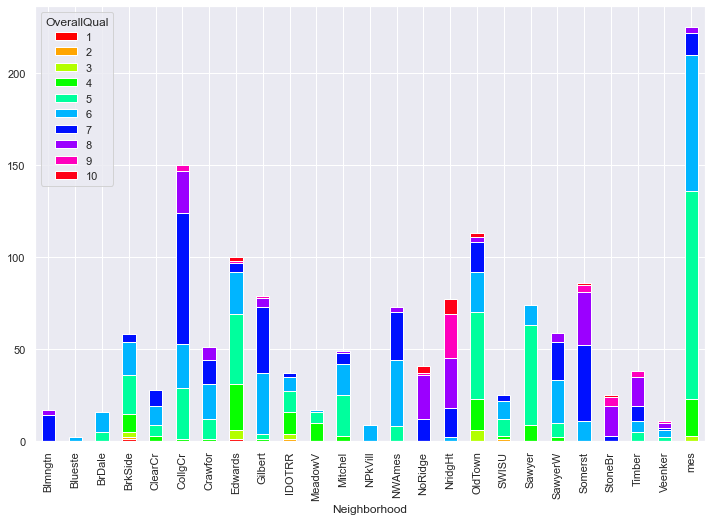

In [35]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='hsv')

Text(0, 0.5, 'SalePrice')

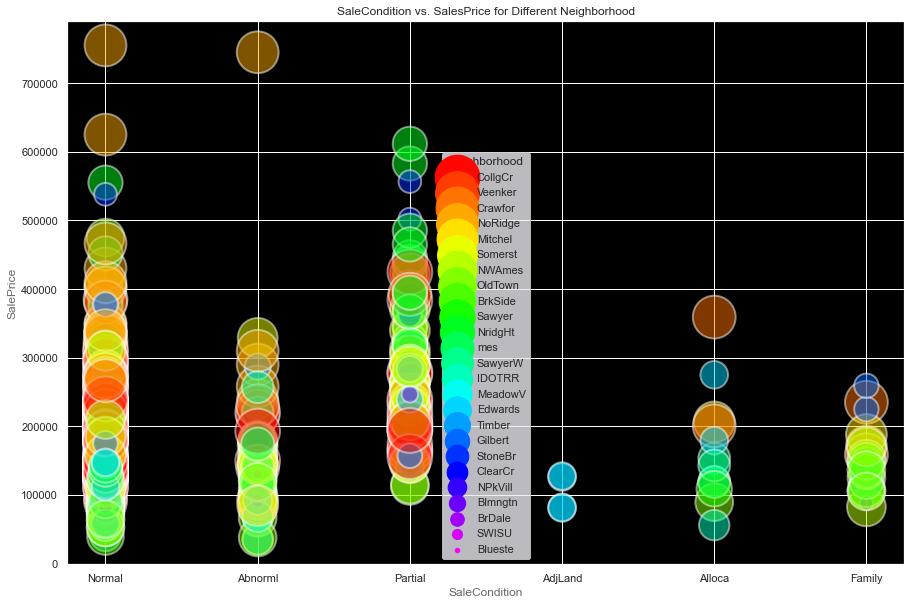

In [36]:
f, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=df, x="SaleCondition", y="SalePrice", size="Neighborhood", hue="Neighborhood", alpha=0.5, sizes=(20, 2000), ax=ax,palette='gist_rainbow').set_facecolor('black')

ax.set_title('SaleCondition vs. SalesPrice for Different Neighborhood')
ax.set_xlabel("SaleCondition", alpha=0.7)
ax.set_ylabel("SalePrice", alpha=0.7)

In [37]:
cat_df.columns

Index(['Id', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# Individual comparision of 'SalePrice' with Categorical Data

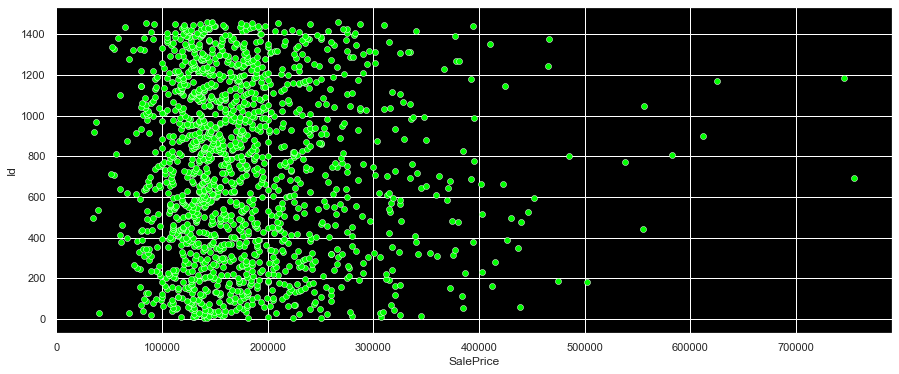

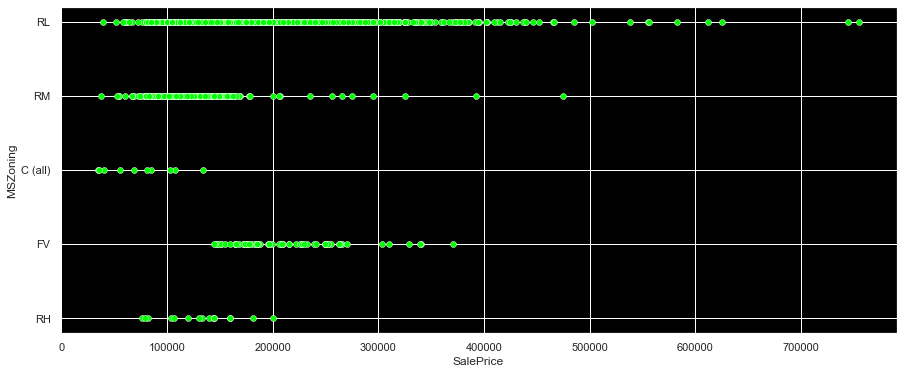

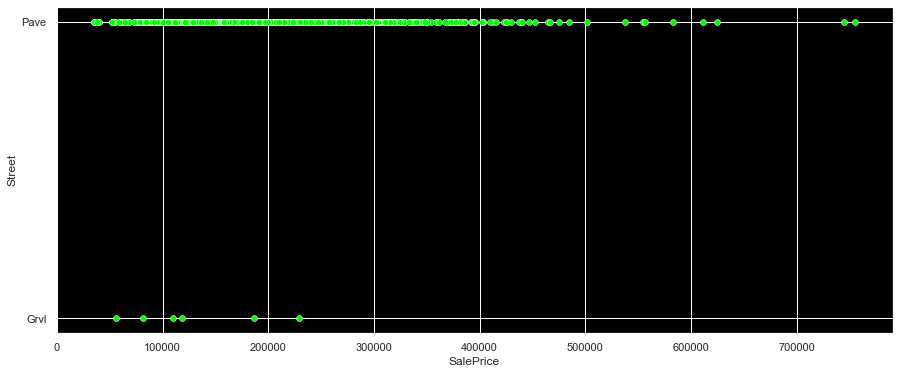

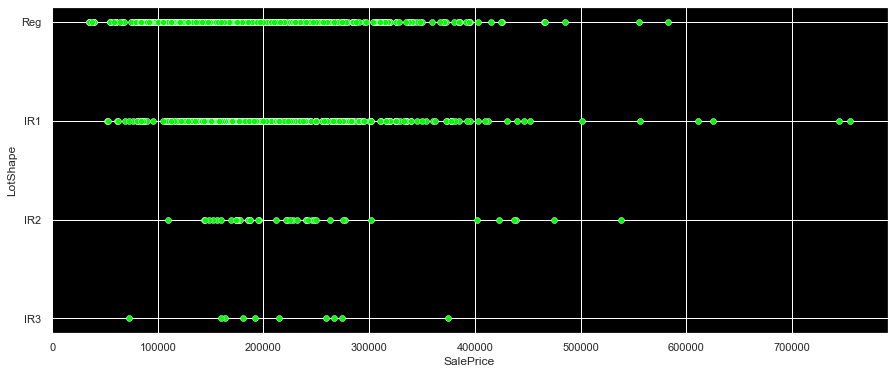

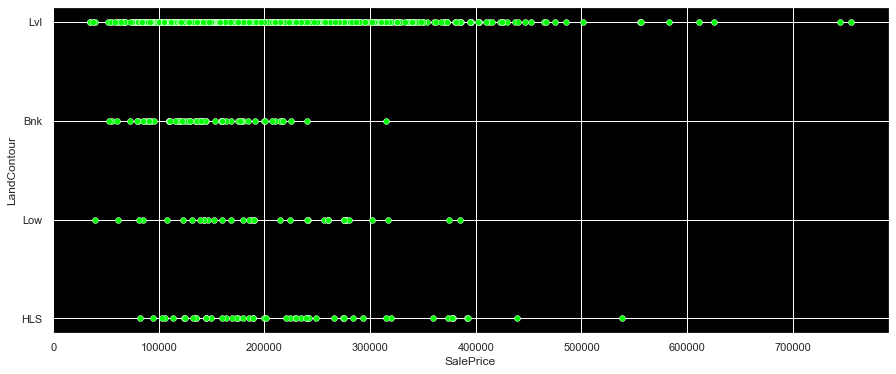

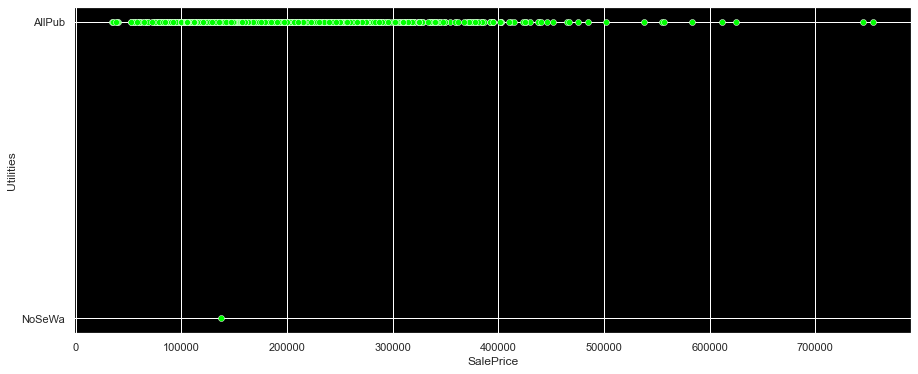

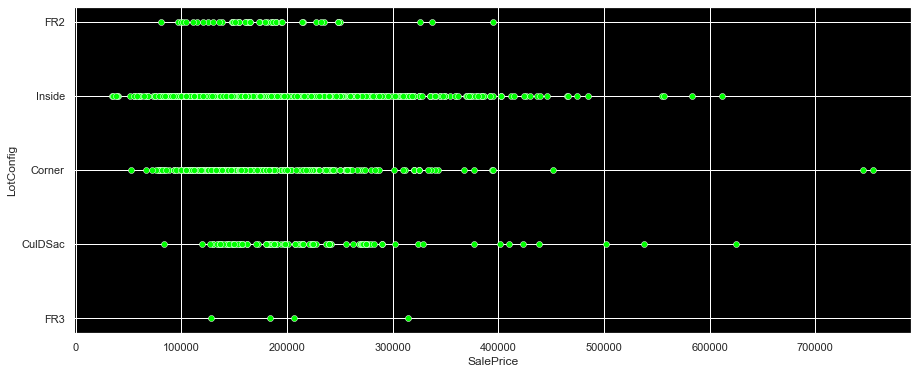

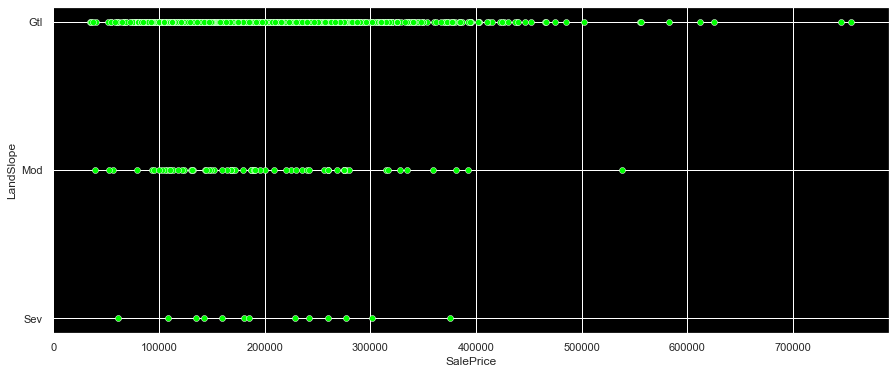

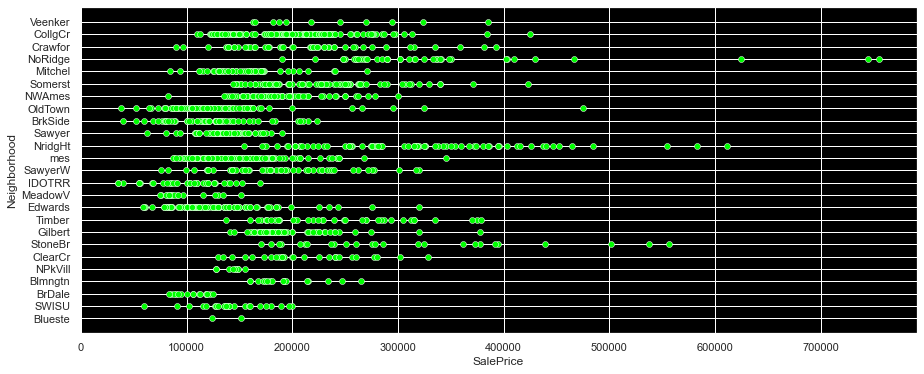

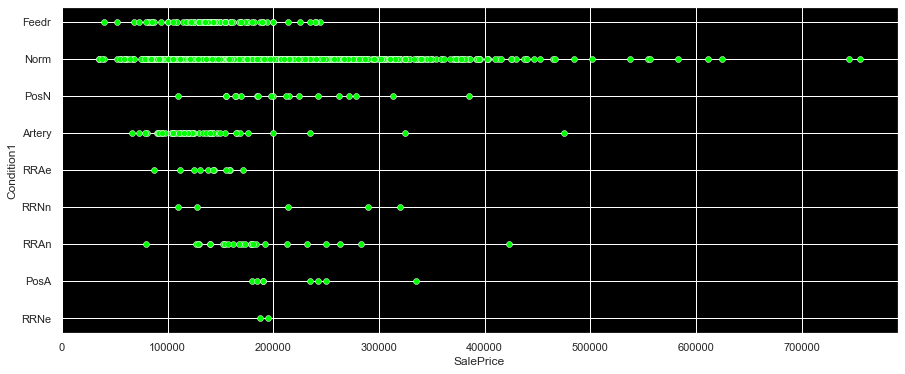

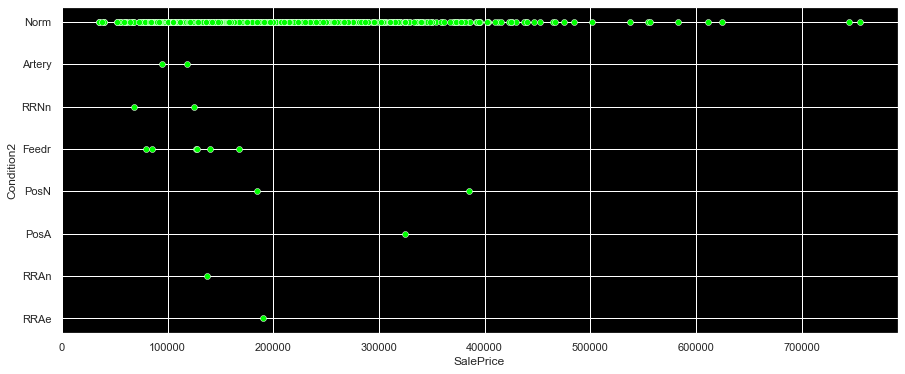

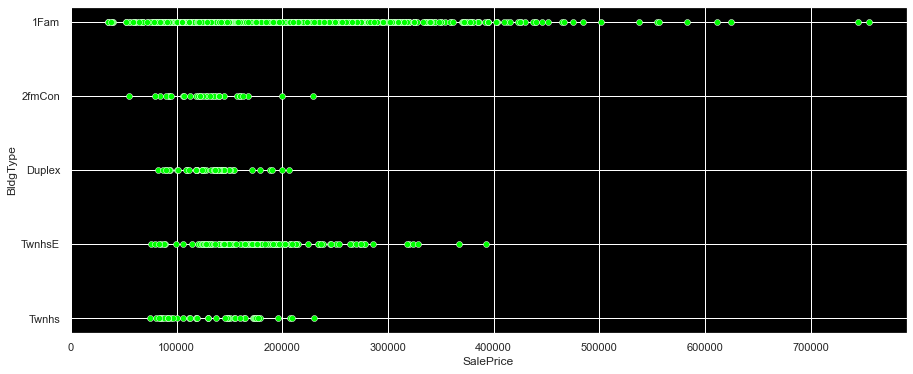

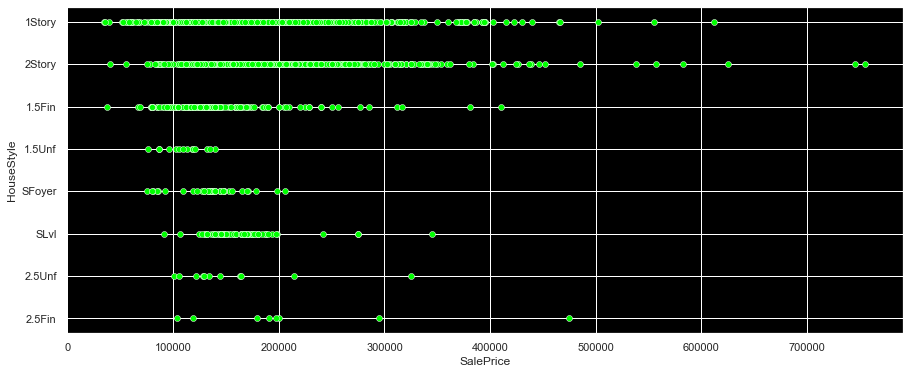

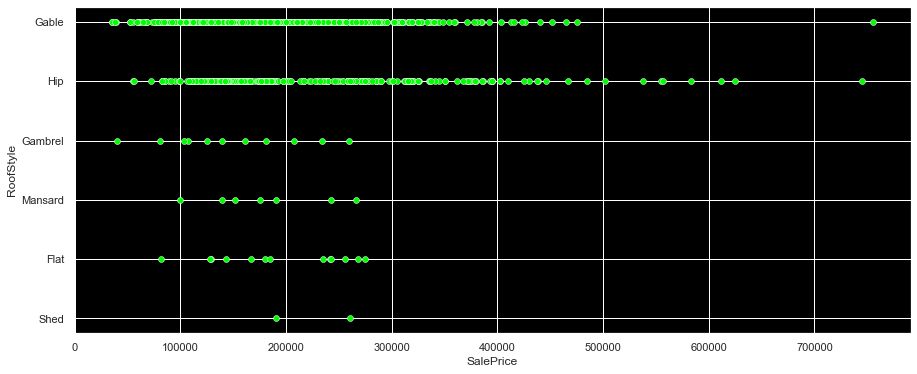

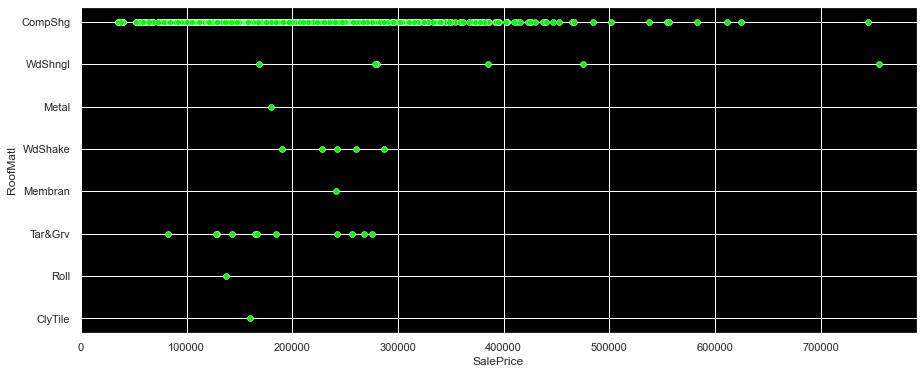

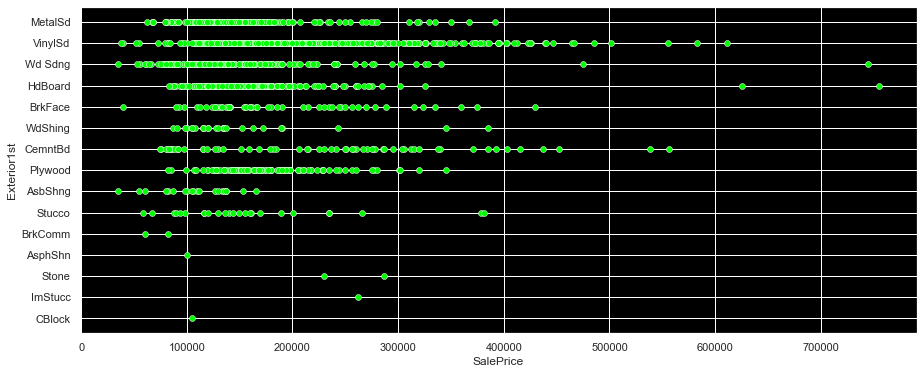

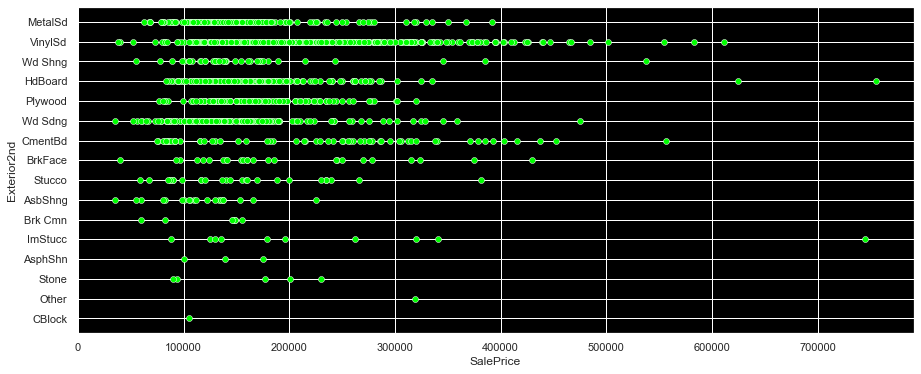

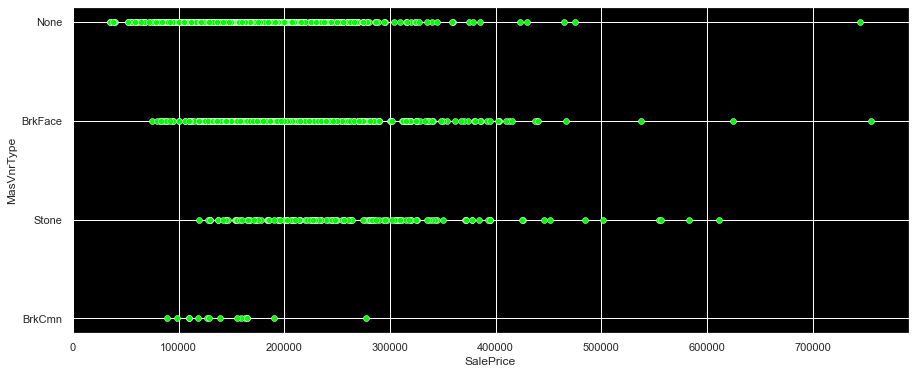

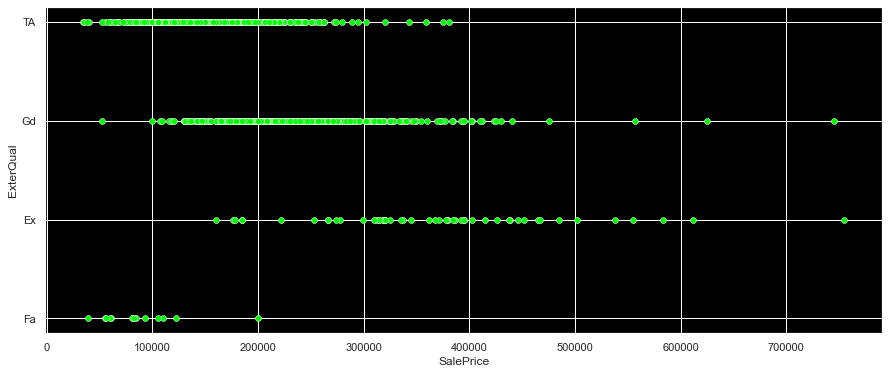

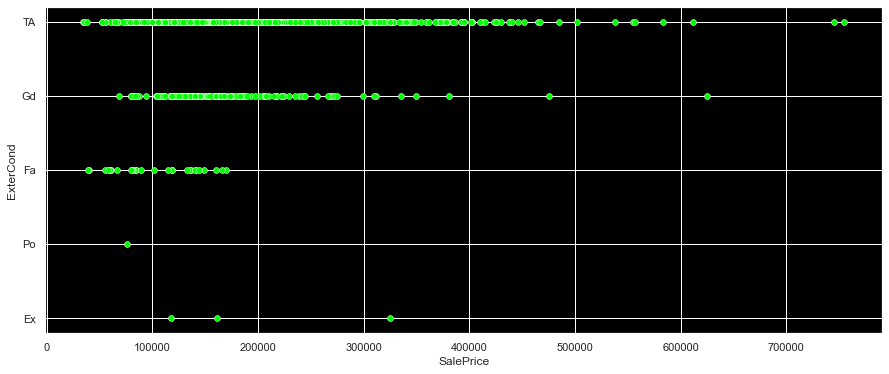

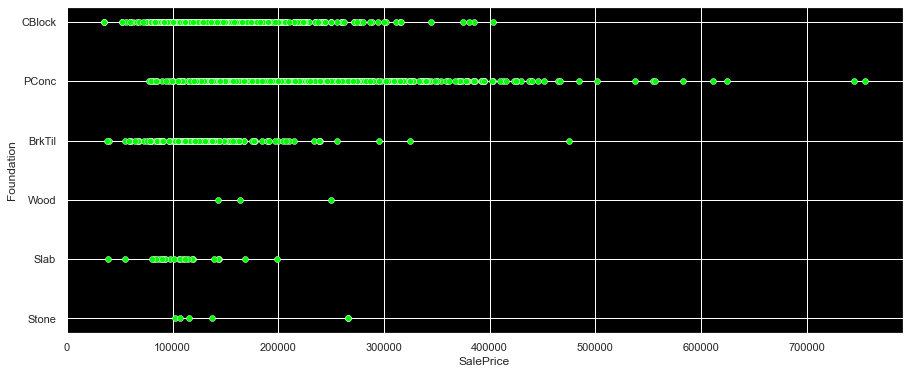

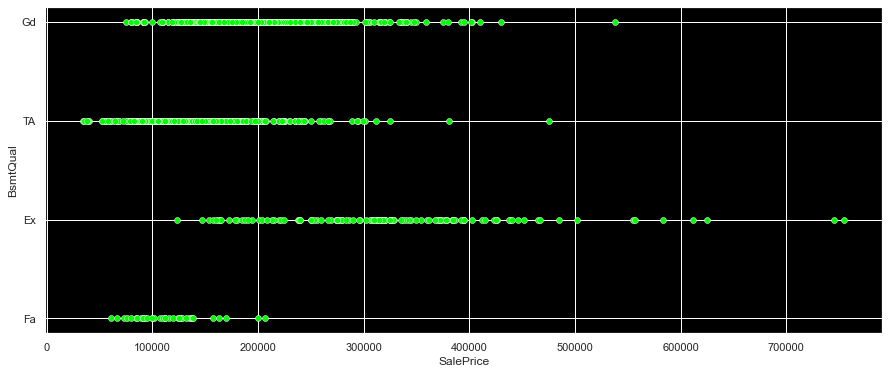

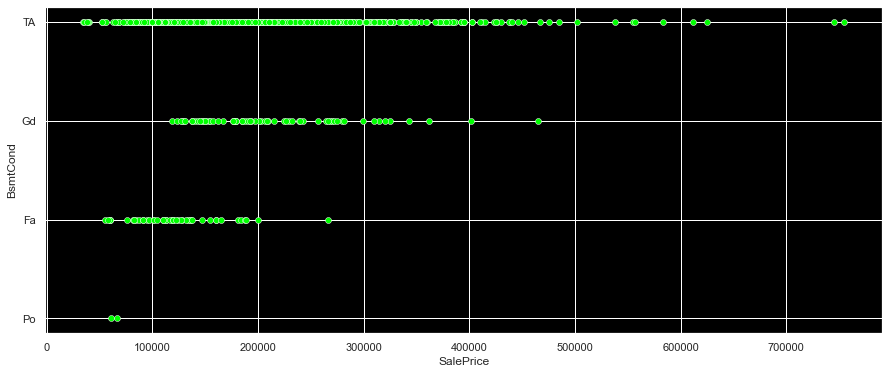

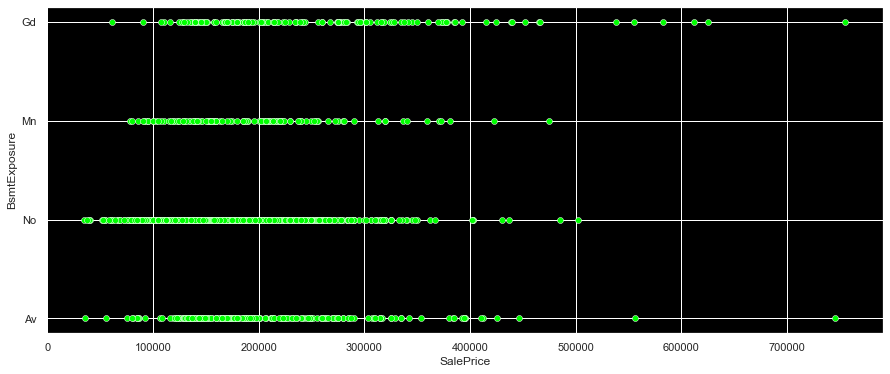

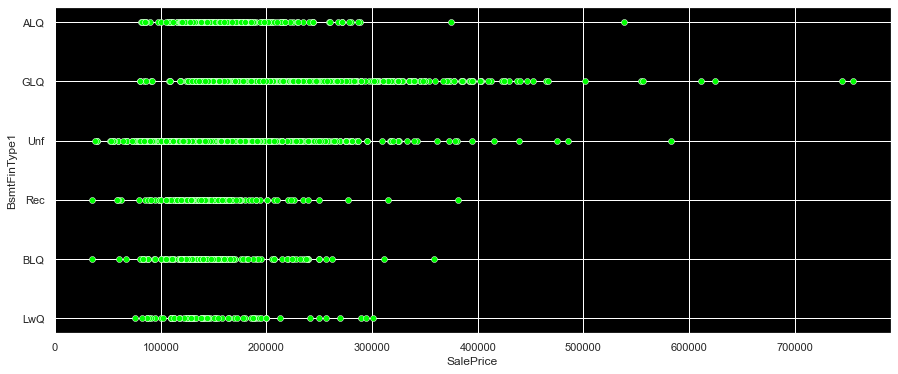

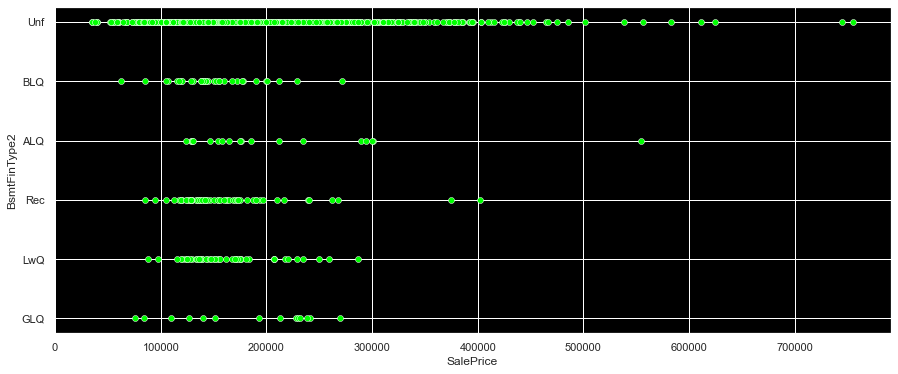

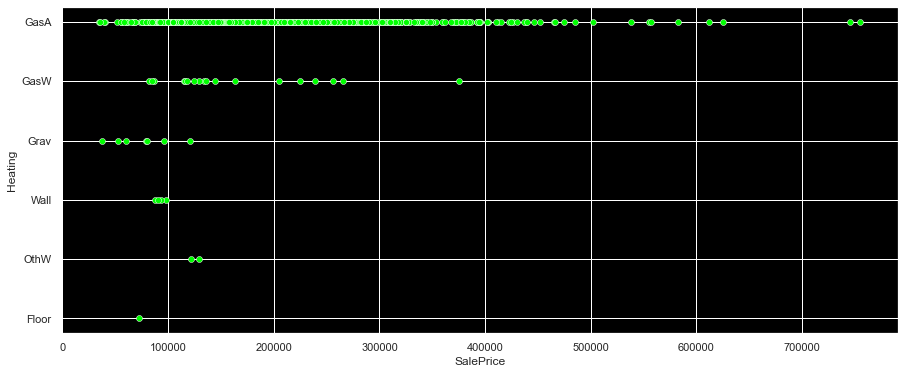

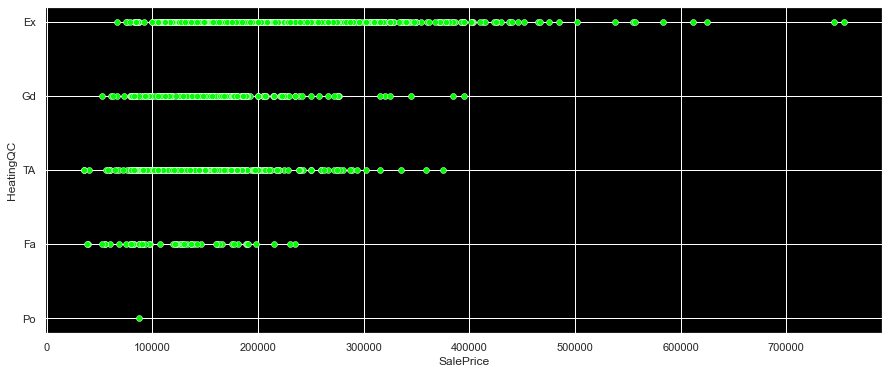

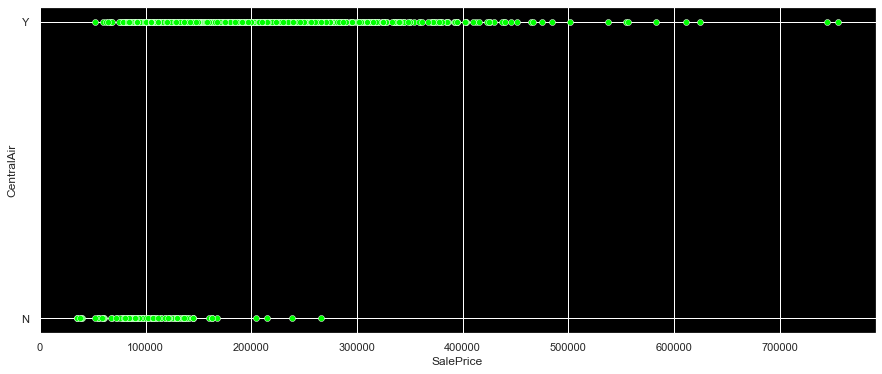

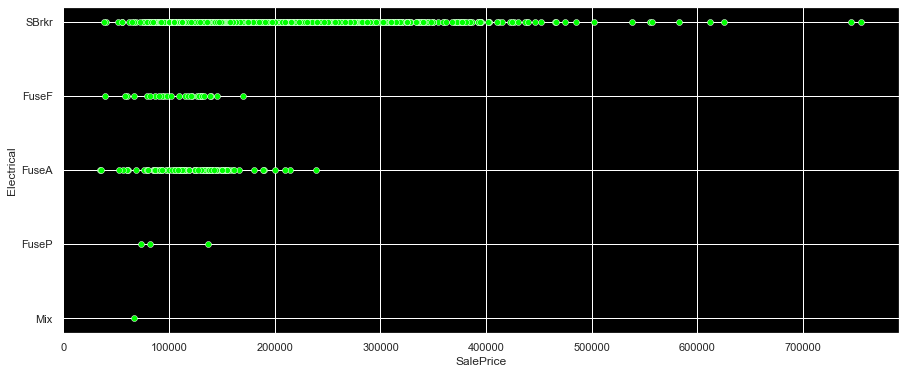

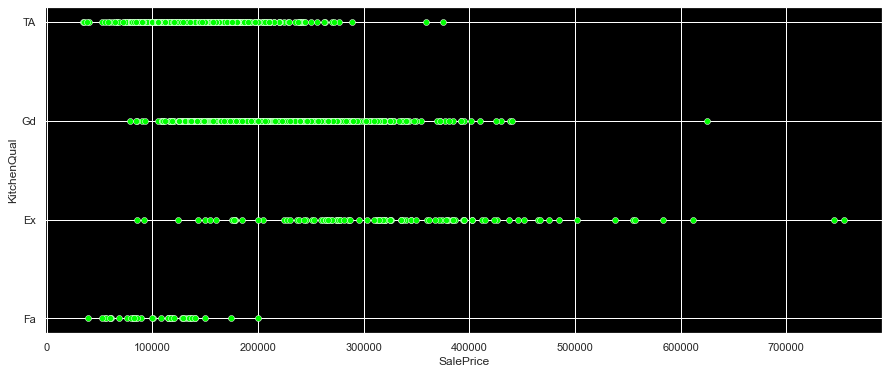

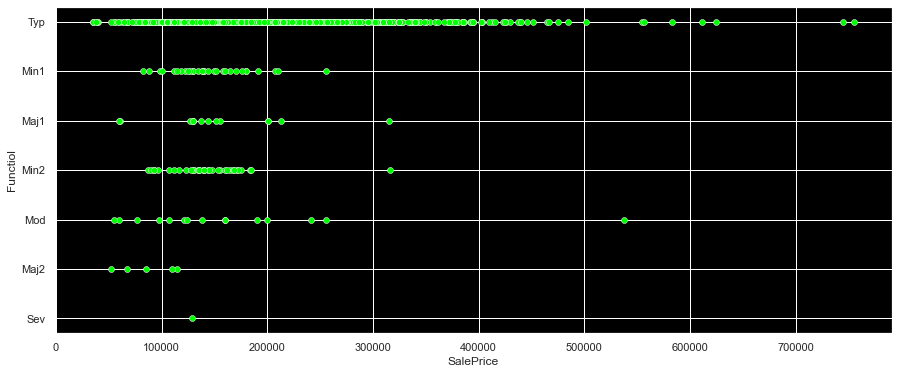

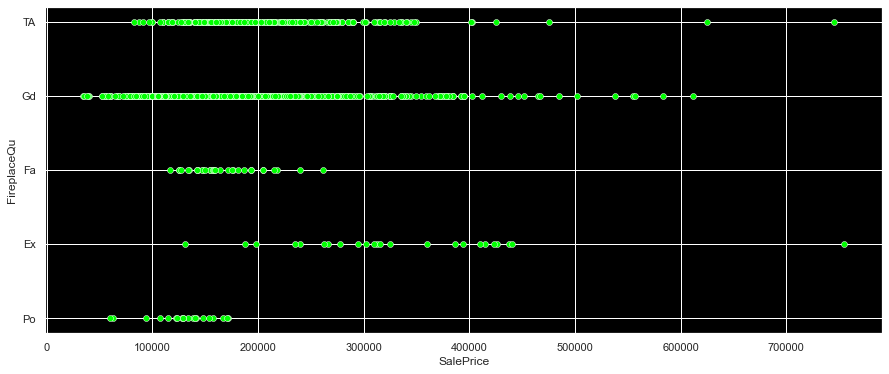

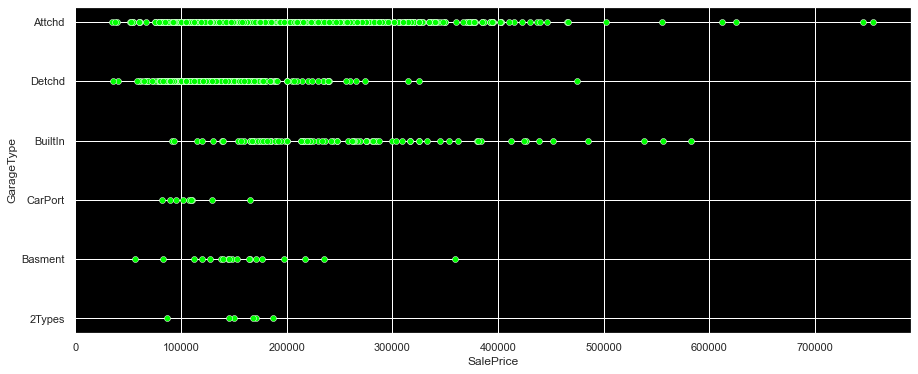

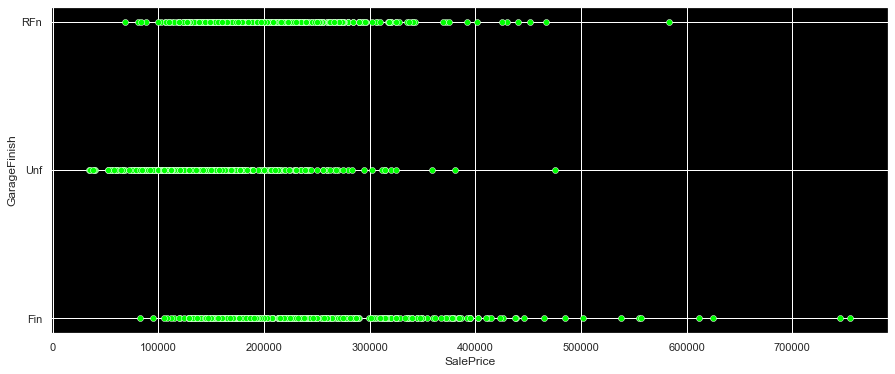

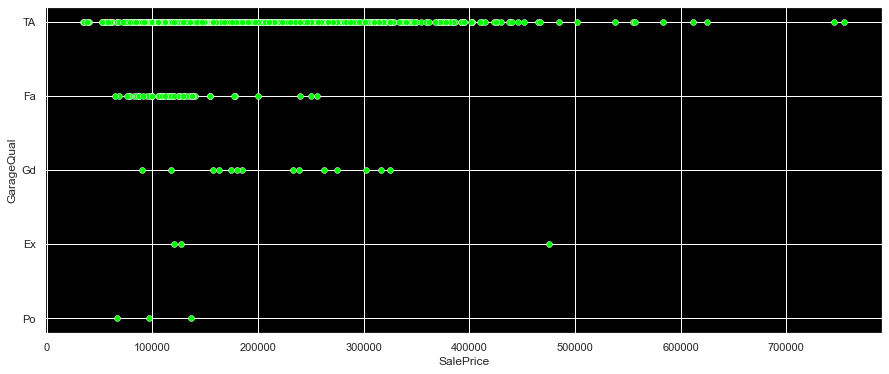

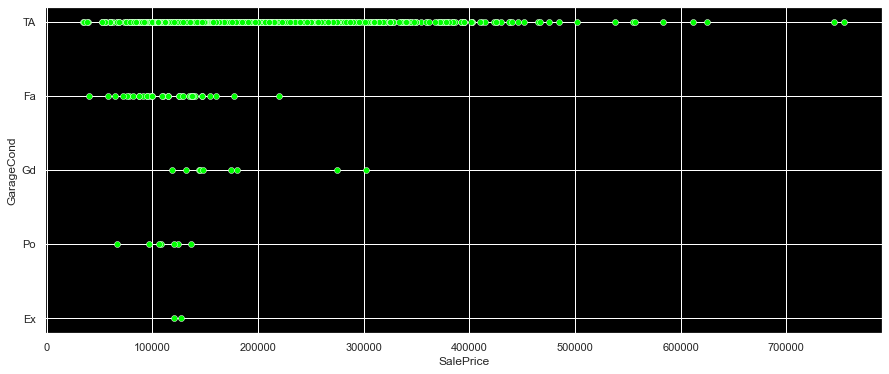

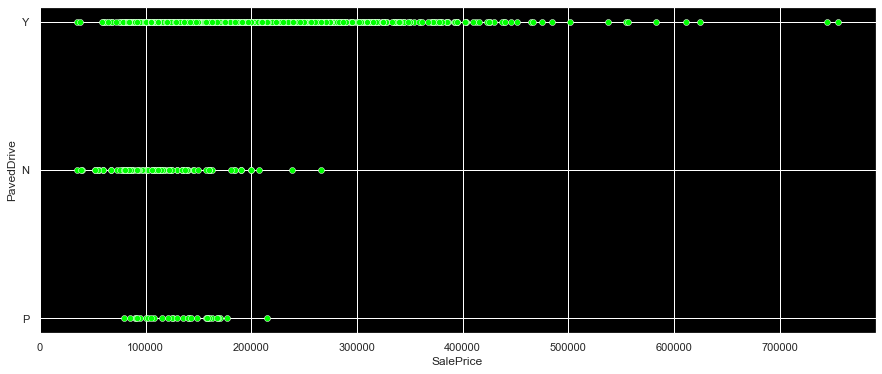

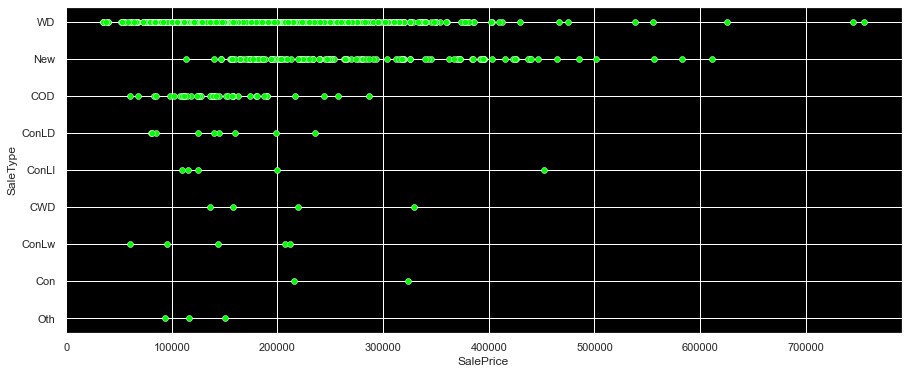

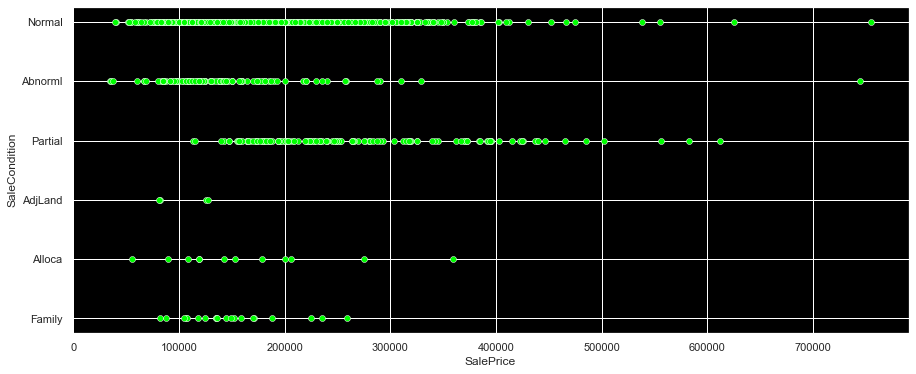

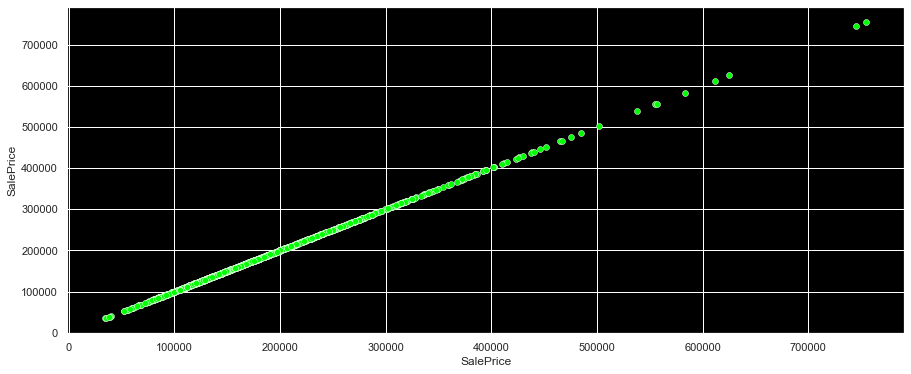

In [38]:
cols = ['Id', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']
for i in cols:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.scatterplot(data=cat_df,x='SalePrice', y=cat_df[i][1:],color = 'lime').set_facecolor('black')

In [39]:
col=cat_df.columns
col

Index(['Id', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# Comparision of "SalePrice" with 'SaleType', 'SaleCondition'

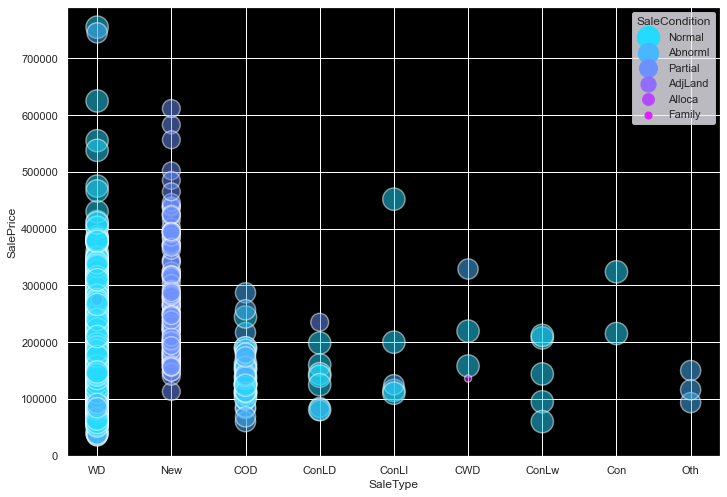

In [40]:
sns.scatterplot(data=cat_df, x='SaleType', y="SalePrice",size='SaleCondition',sizes=(50, 500),alpha=0.5 , hue='SaleCondition', palette='cool').set_facecolor('black')

# Comparision of "SalePrice" with 'LotConfig', 'LandContour'

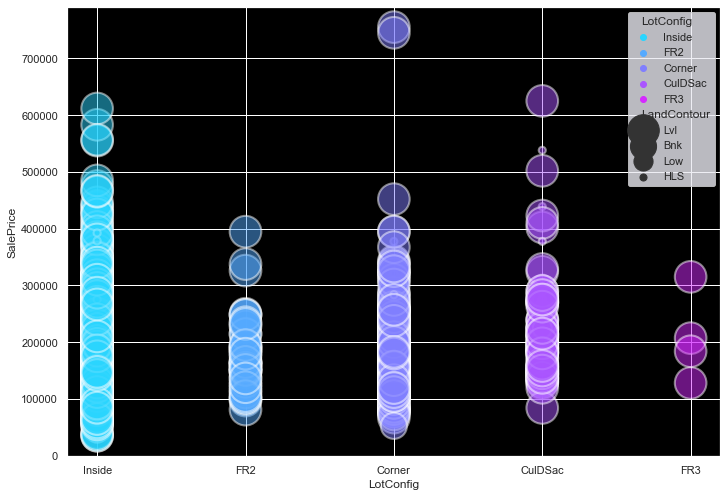

In [41]:
sns.scatterplot(data=cat_df, x='LotConfig', y="SalePrice",size='LandContour',sizes=(50, 1000),alpha=0.5 , hue='LotConfig', palette='cool').set_facecolor('black')

# Comparision of "SalePrice" with 'MSZoning', 'Street'

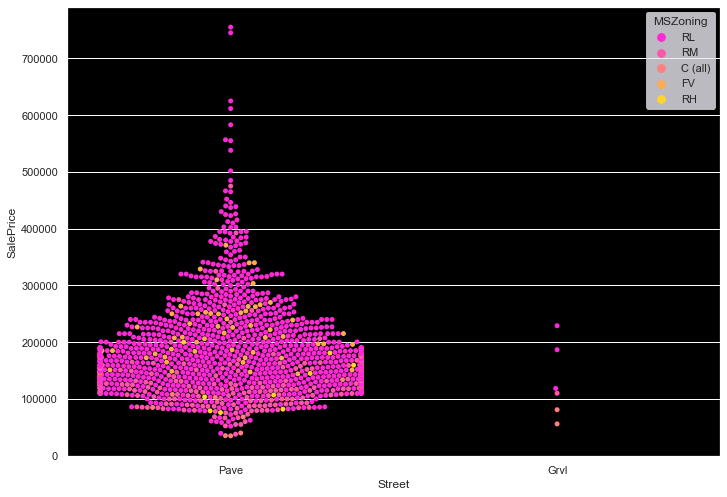

In [42]:
sns.swarmplot('Street', 'SalePrice', data=df,hue='MSZoning',palette='spring').set_facecolor('black')

# Comparision of "SalePrice" with 'Neighborhood', 'Condition1'

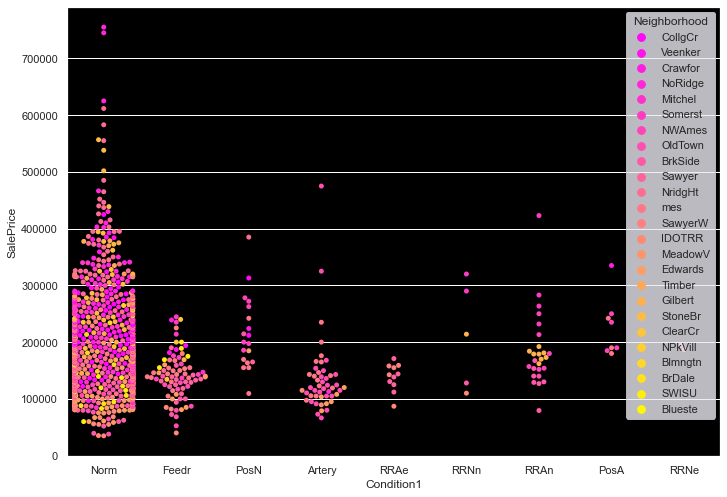

In [43]:
sns.swarmplot('Condition1', 'SalePrice', data=df,hue='Neighborhood',palette='spring').set_facecolor('black')

# Comparision of "SalePrice" with 'Condition2','BldgType', 'HouseStyle'

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

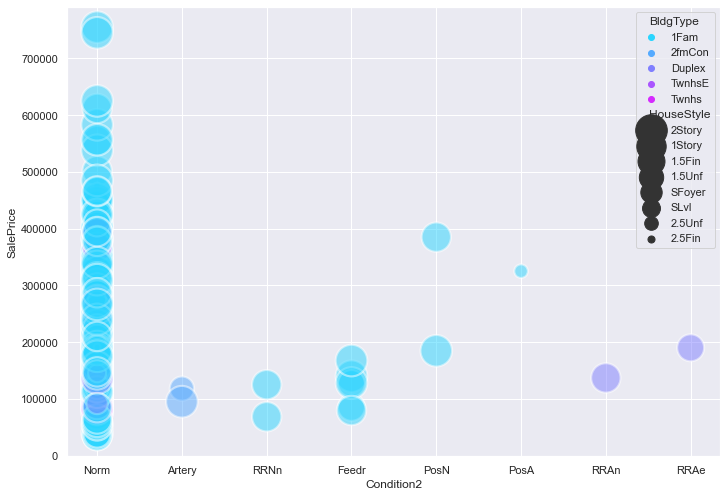

In [44]:
sns.scatterplot(data=cat_df, x='Condition2', y="SalePrice",size='HouseStyle',sizes=(50, 1000),alpha=0.5 , hue='BldgType', palette='cool')

# Comparision of "SalePrice" with  'RoofStyle','Exterior1st','Exterior2nd'

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

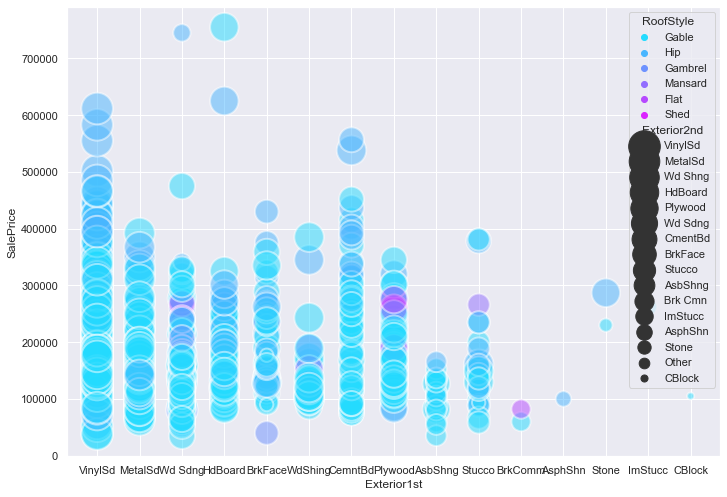

In [45]:
sns.scatterplot(data=cat_df, x= 'Exterior1st', y="SalePrice",size='Exterior2nd',sizes=(50, 1000),alpha=0.5 , hue='RoofStyle', palette='cool')

# Comparision of "SalePrice" with 'RoofStyle', 'RoofMatl','MasVnrType'

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

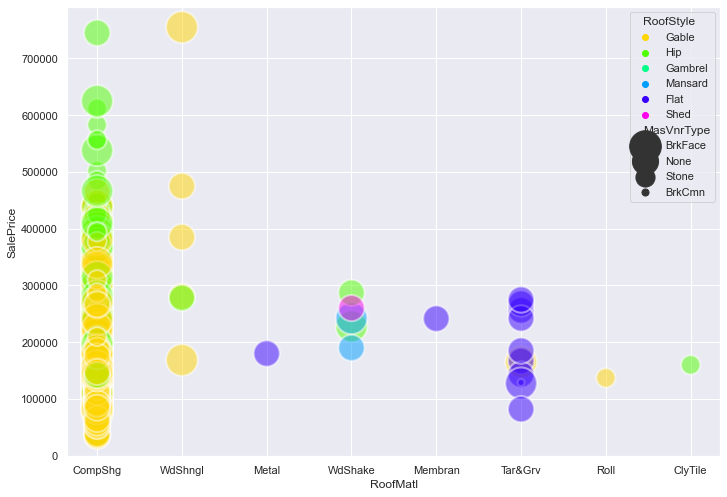

In [46]:
sns.scatterplot(data=cat_df, x= 'RoofMatl', y="SalePrice",size='MasVnrType',sizes=(50, 1000),alpha=0.5 , hue='RoofStyle', palette='hsv')

In [47]:
cat_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

# Comparision of "SalePrice" with 'ExterQual', 'ExterCond'

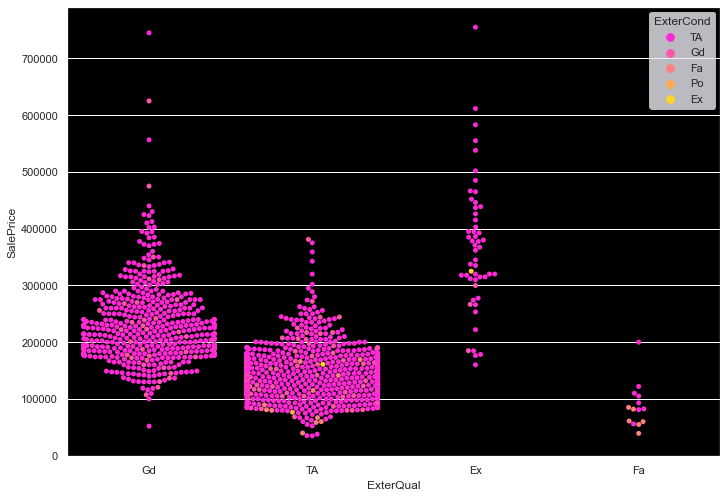

In [48]:
sns.swarmplot('ExterQual', 'SalePrice', data=df,hue='ExterCond',palette='spring').set_facecolor('black')

# Comparision of "SalePrice" with 'Foundation','BsmtQual'

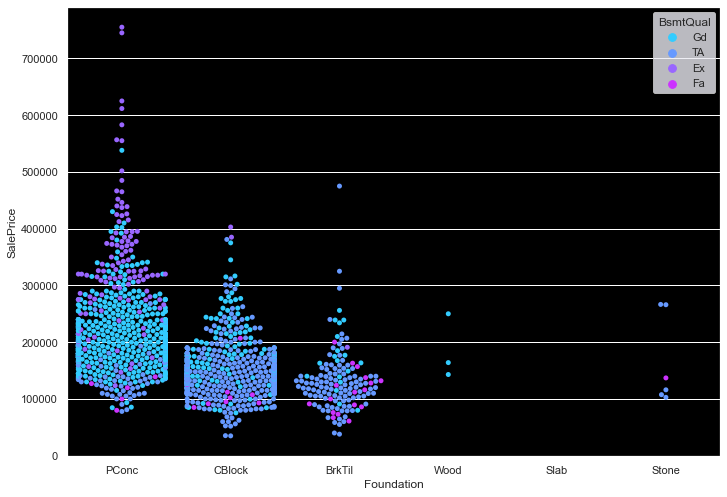

In [49]:
sns.swarmplot('Foundation', 'SalePrice', data=df,hue='BsmtQual',palette='cool').set_facecolor('black')

# Count plot for all Categorical variables

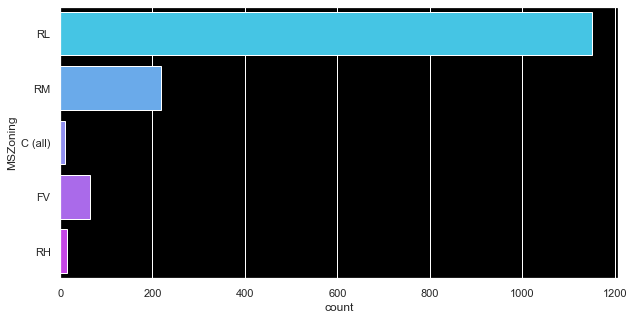

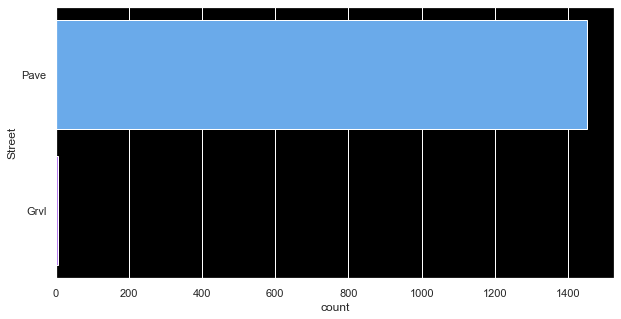

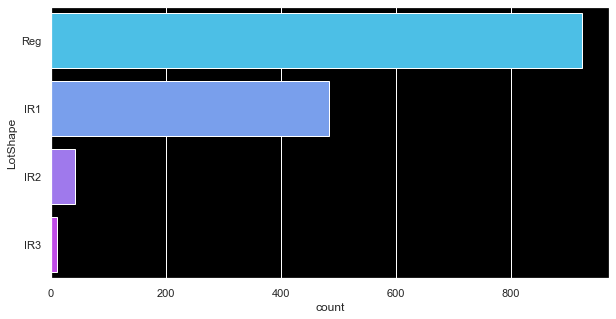

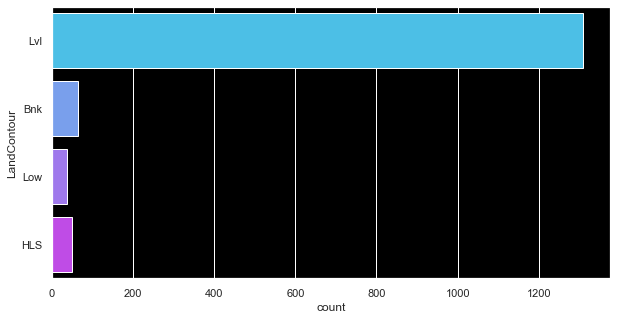

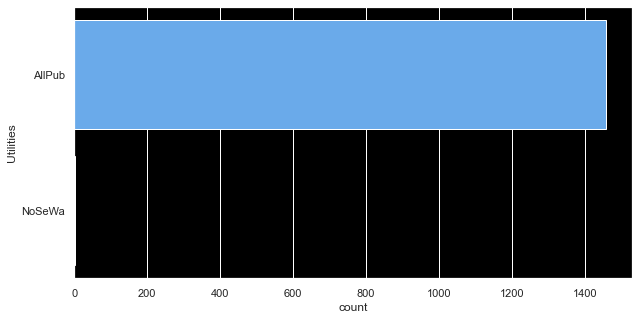

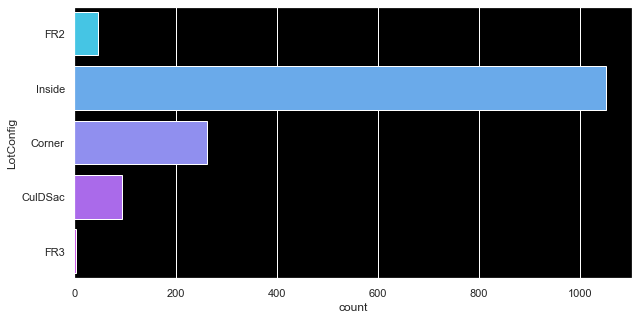

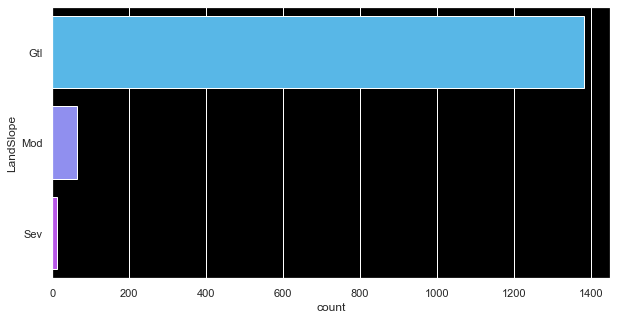

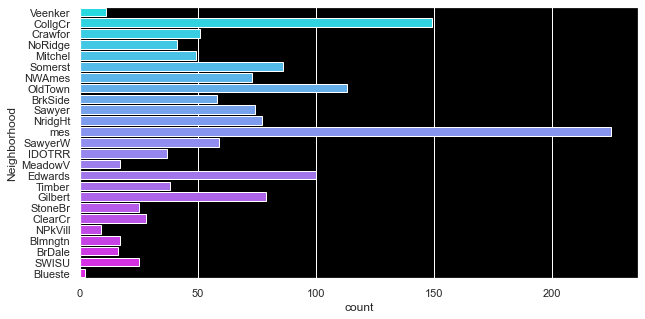

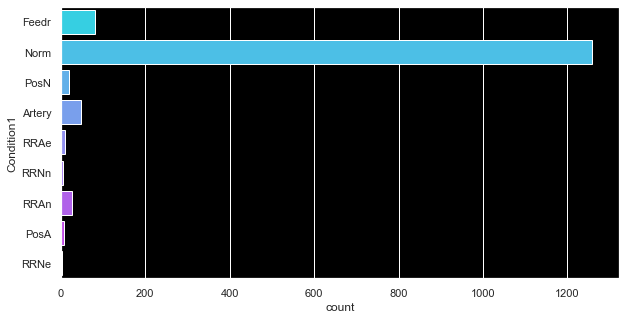

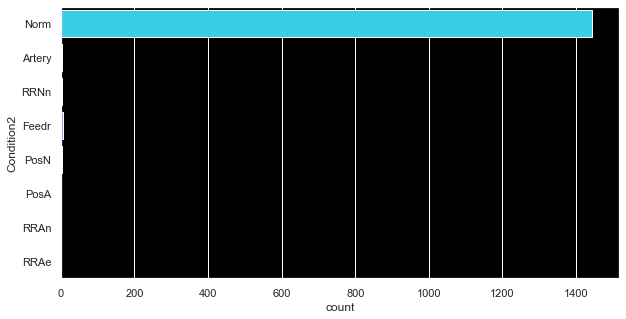

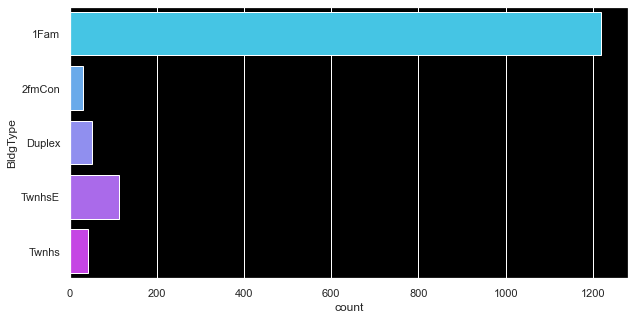

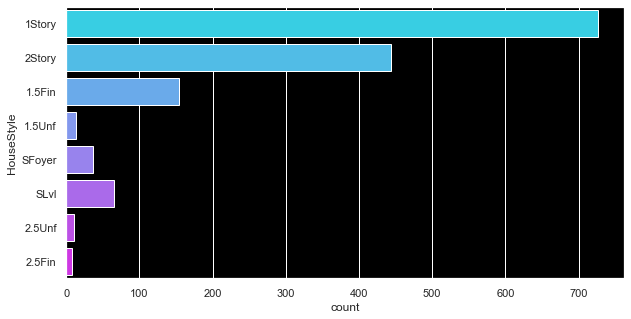

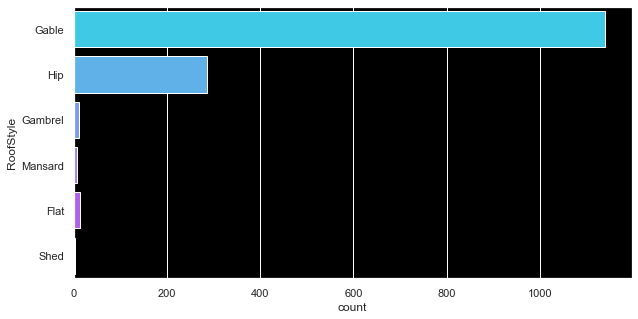

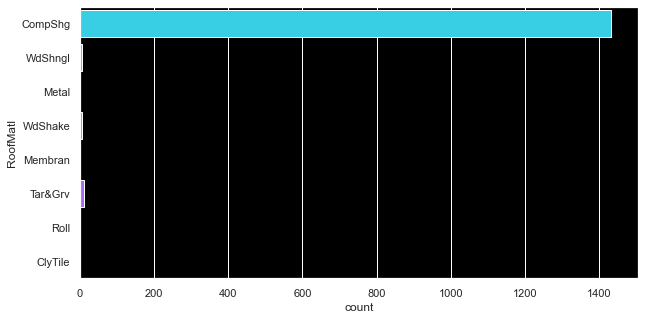

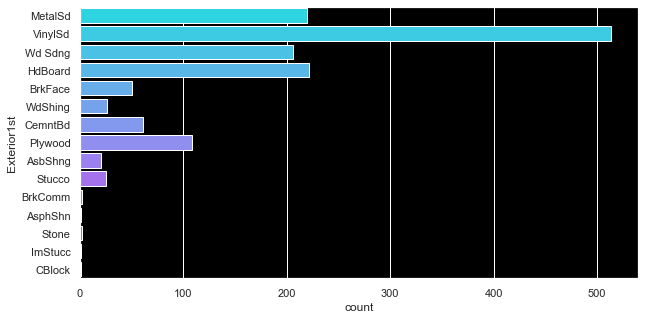

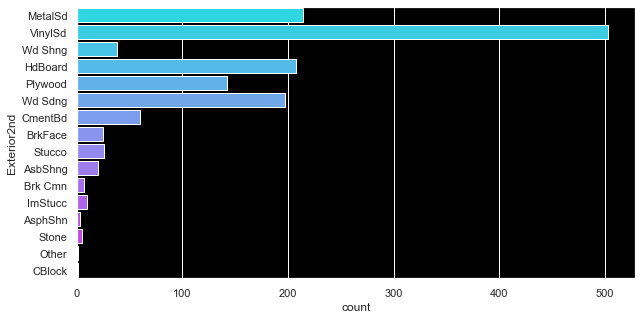

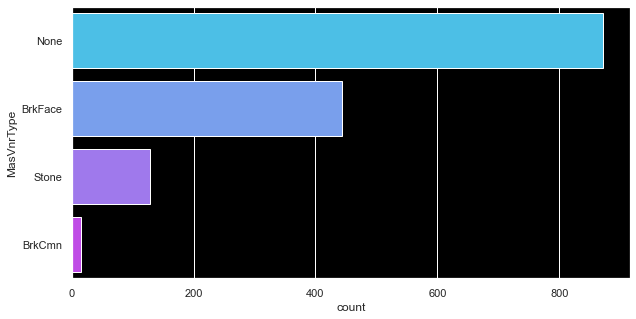

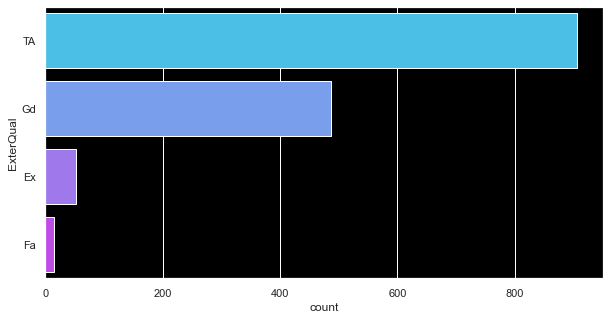

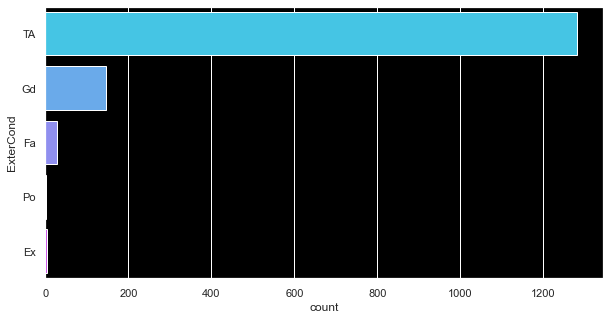

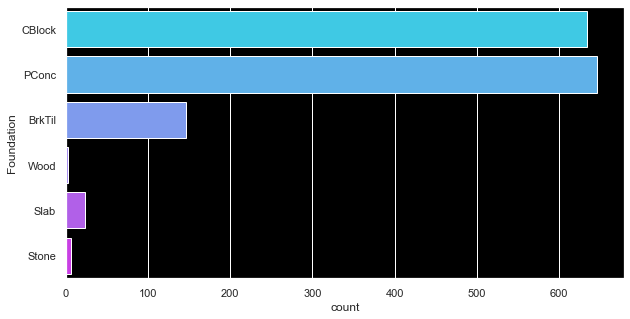

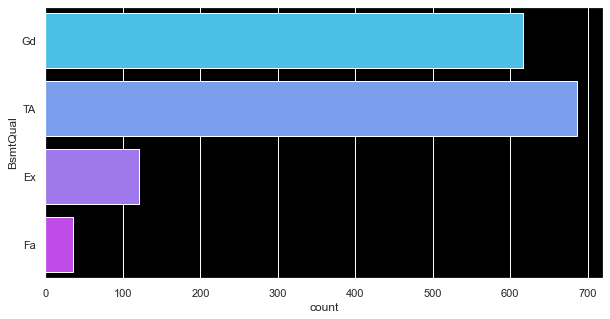

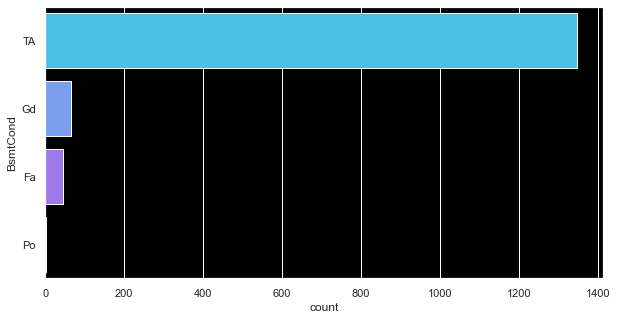

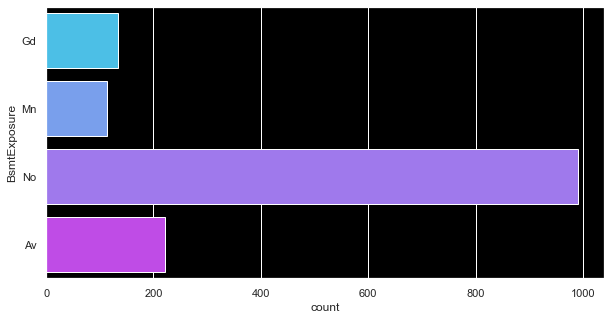

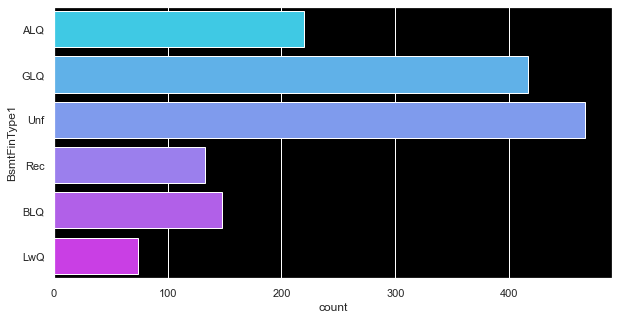

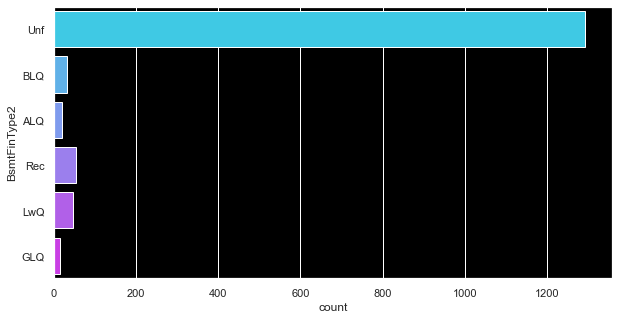

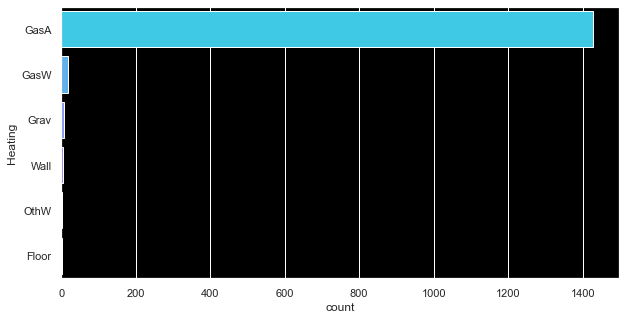

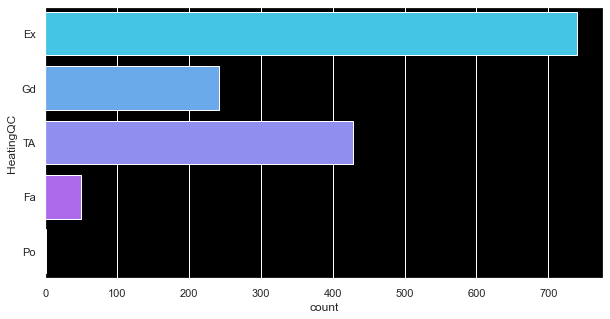

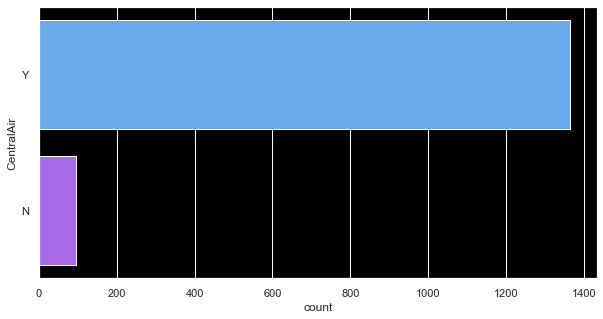

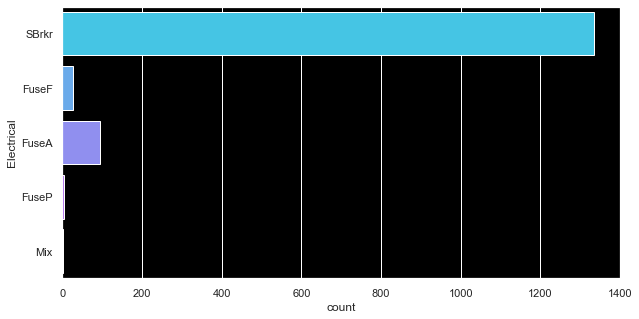

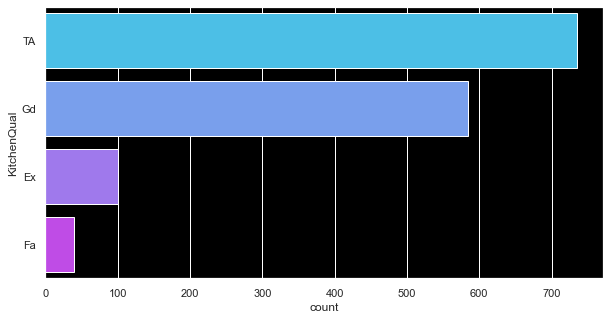

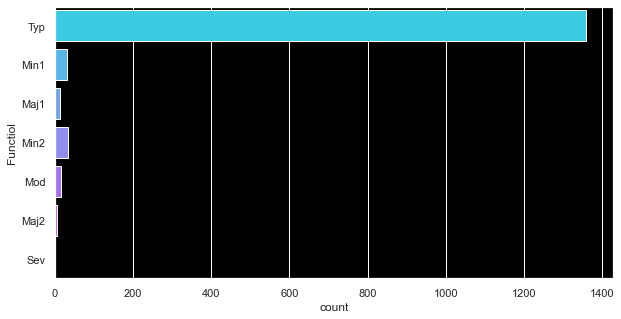

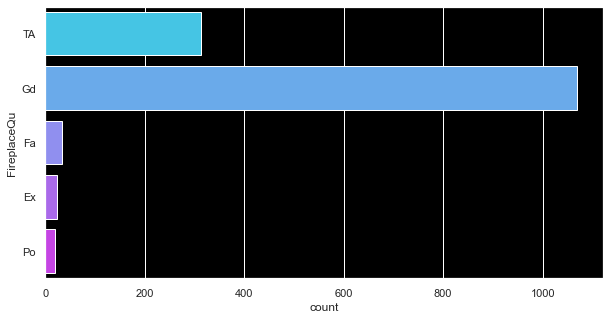

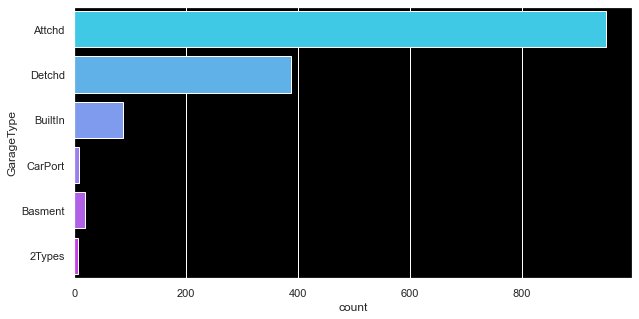

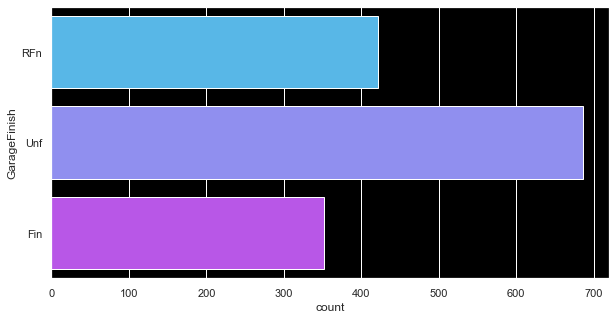

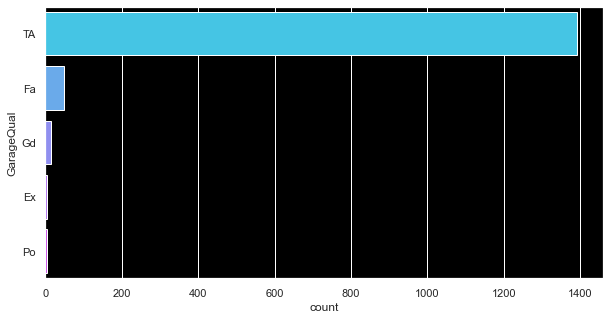

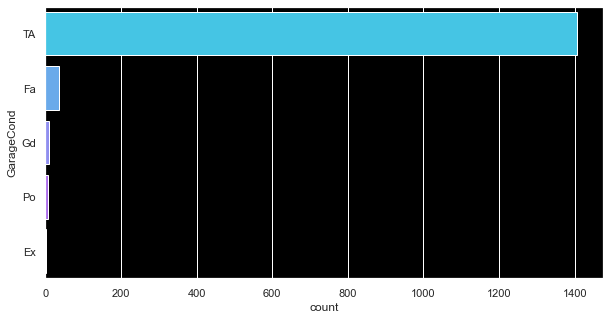

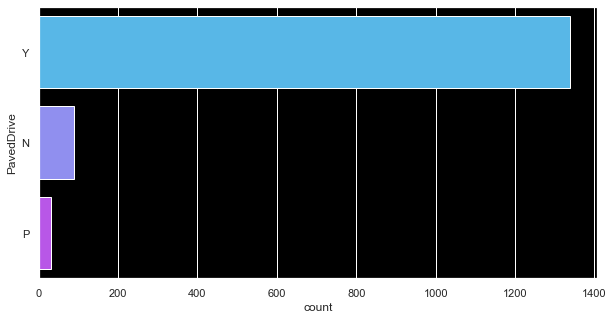

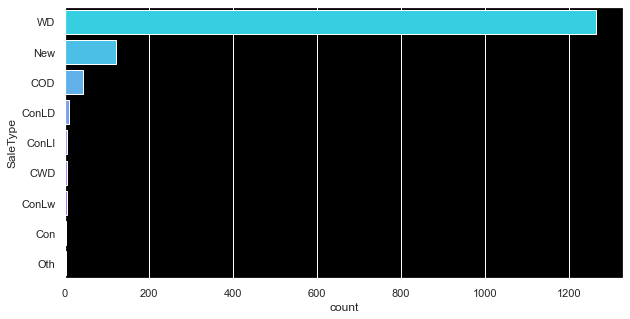

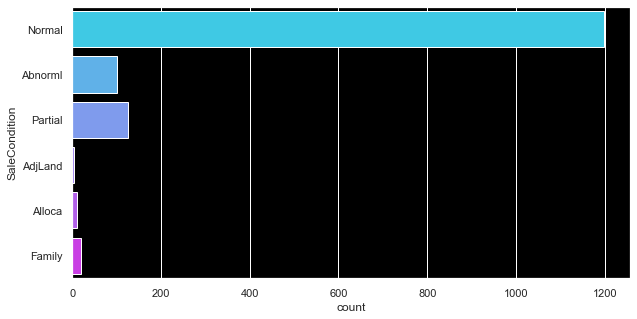

In [50]:
cols = [ 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for i in cols:
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    sns.countplot(data=cat_df, y=cat_df[i][1:], palette='cool').set_facecolor('black')

# Combine all the significant categorical and numerical variables

In [51]:
imp_df=num_df[corr_top.columns]
imp_df

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1         65.0     8450            7            5       2003   
1        2         80.0     9600            6            8       1976   
2        3         68.0    11250            7            5       2001   
3        4         60.0     9550            7            5       1915   
4        5         84.0    14260            8            5       2000   
...    ...          ...      ...          ...          ...        ...   
1455  1456         62.0     7917            6            5       1999   
1456  1457         85.0    13175            6            6       1978   
1457  1458         66.0     9042            7            9       1941   
1458  1459         68.0     9717            5            6       1950   
1459  1460         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0             2003       196.0         706           0  ...         548   
1             1976         0.0         978           0  ...         460   
2             2002       162.0         486           0  ...         608   
3             1970         0.0         216           0  ...         642   
4             2000       350.0         655           0  ...         836   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...         460   
1456          1988       119.0         790         163  ...         500   
1457          2006         0.0         275           0  ...         252   
1458          1996         0.0          49        1029  ...         240   
1459          1965         0.0         830         290  ...         276   

      WoodDeckSF  OpenPorchSF  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              0           61          0            0         0        0   
1            298            0          0            0         0        0   
2              0           42          0            0         0        0   
3              0           35          0            0         0        0   
4            192           84          0            0         0        0   
...          ...          ...        ...          ...       ...      ...   
1455           0           40          0            0         0        0   
1456         349            0          0            0         0        0   
1457           0           60          0            0         0     2500   
1458         366            0          0            0         0        0   
1459         736           68          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 30 columns]

In [52]:
frames=[imp_df,cat_df]
ready_df=pd.concat(frames)
len(imp_df.columns)

30

In [53]:
cat_imp=cat_df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].nunique().sort_values(ascending=False).head(30)
len(cat_imp)

30

In [54]:
frames=[imp_df,cat_imp]
ready_df=pd.concat(frames)
len(ready_df.columns)

31

# Plot box plot for the new dataset to find the variables with outliers

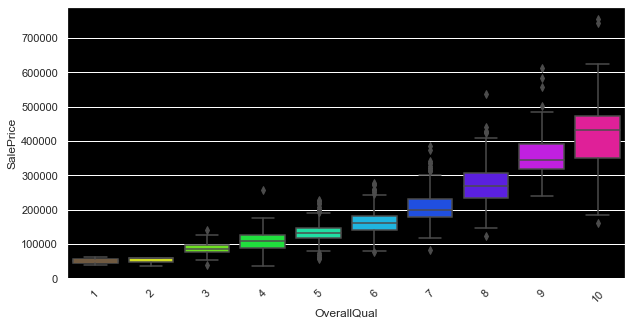

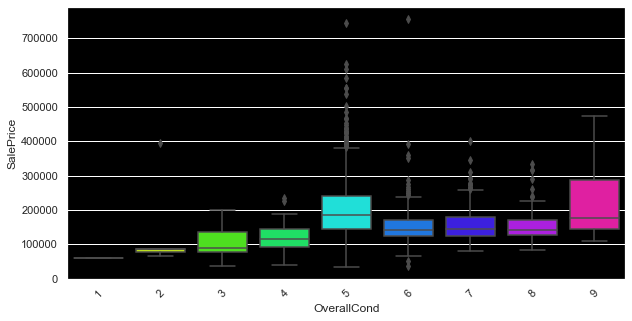

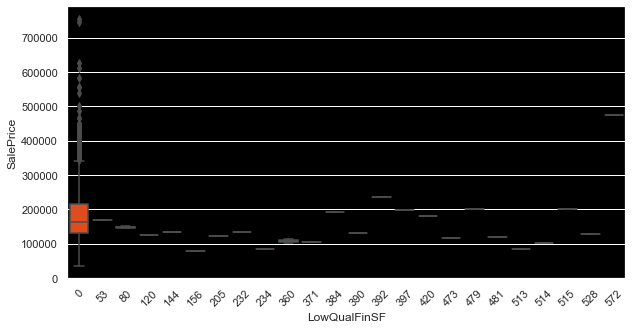

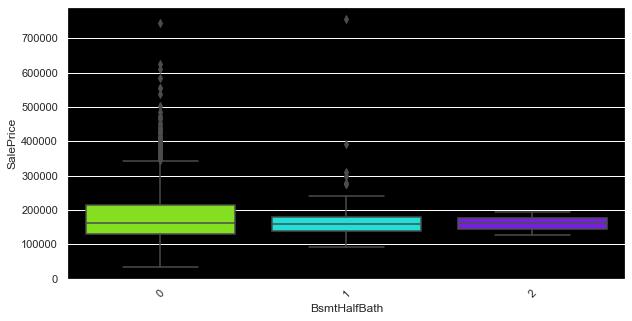

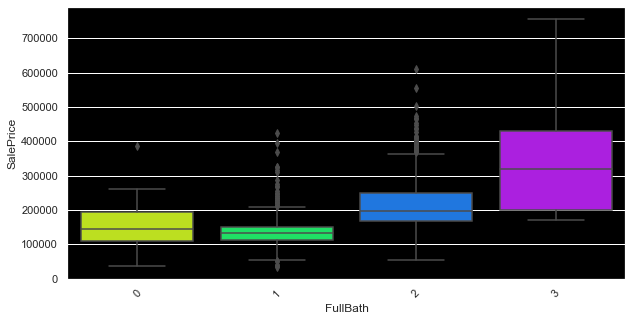

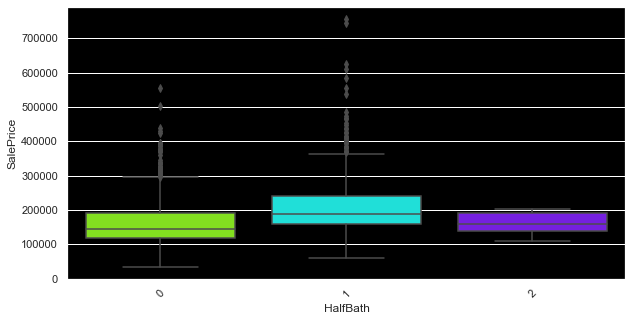

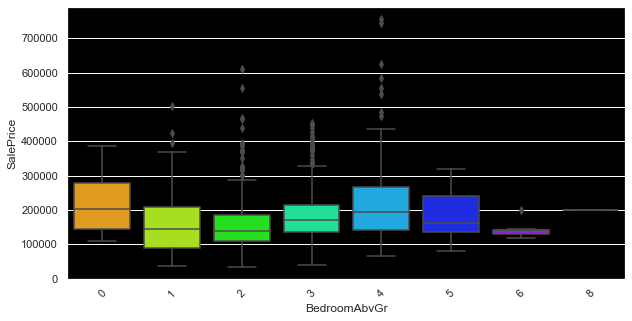

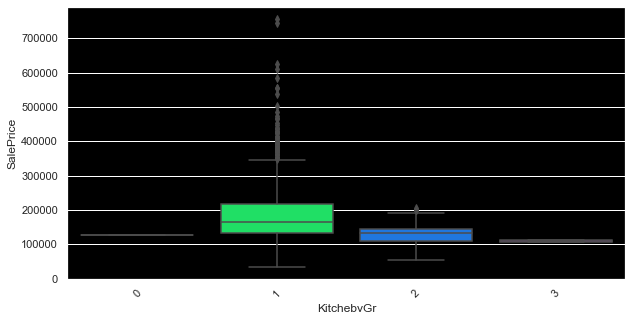

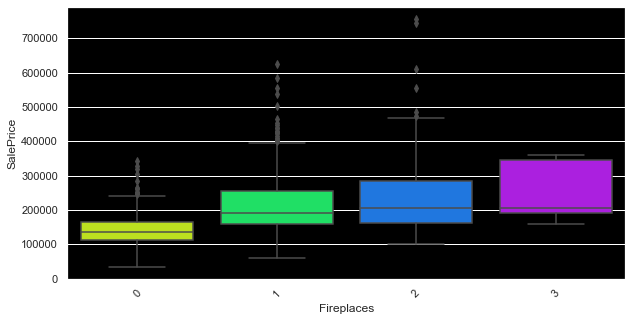

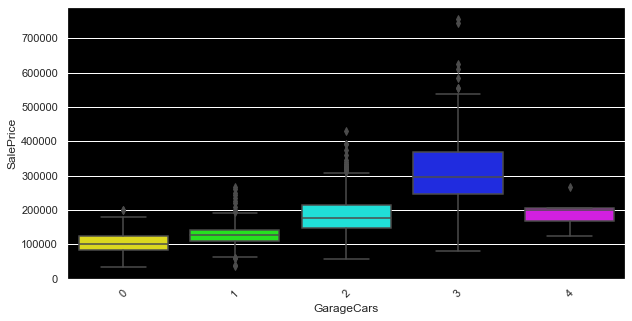

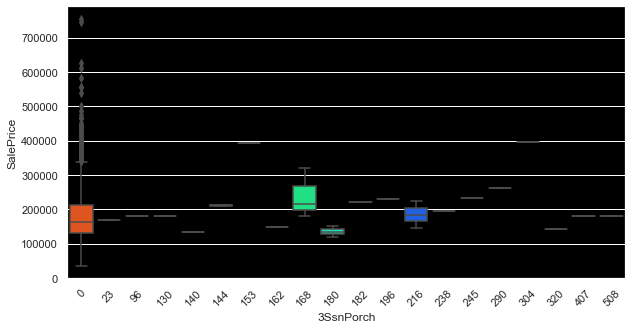

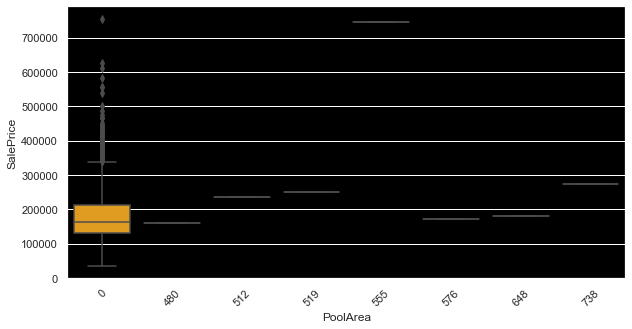

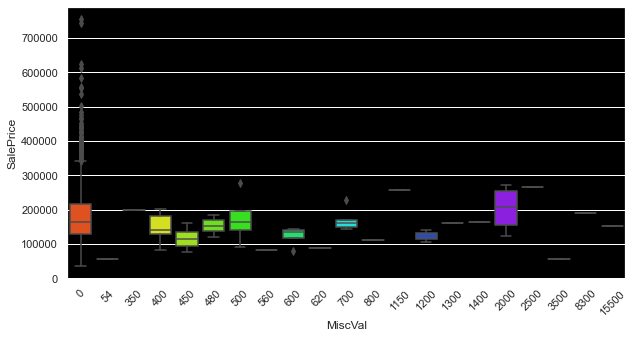

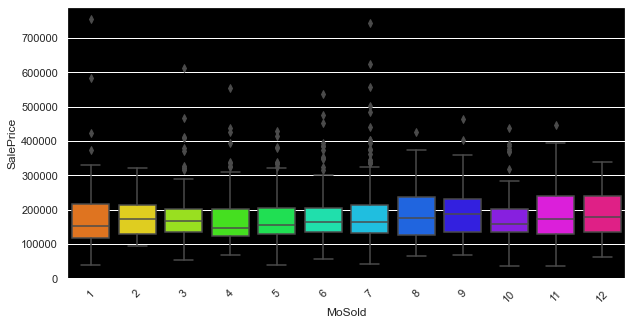

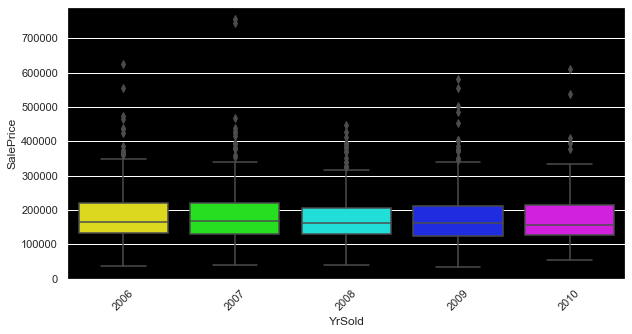

In [55]:
cols =[   'OverallQual',  'OverallCond', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',  'HalfBath','BedroomAbvGr',   'KitchebvGr',   'Fireplaces',   'GarageCars',       '3SsnPorch',
           'PoolArea',      'MiscVal',       'MoSold',
             'YrSold']
for i in cols:
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    plt.xticks(rotation = 45)
    sns.boxplot(df[i][1:], 'SalePrice', data=df,palette='hsv').set_facecolor('black')
    